In [2]:
# Importing packages 
!pip install numpy==1.24.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import json
import urllib.request
import urllib.parse
from tqdm import tqdm
import re
import string

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


from num2words import num2words


from collections import defaultdict
from wordcloud import WordCloud

# enabling inline plots in Jupyter
%matplotlib inline


# disabling verbose messages from datasets library
from datasets import logging
logging.set_verbosity_error()

/opt/anaconda3/envs/berttopic_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load the topic data set
from datasets import load_dataset

df_topics = pd.read_csv('/Users/stilling/Desktop/bert_topic/topic_modelled.csv')

In [5]:
#drop the first column
df_topics = df_topics.drop(columns=['Unnamed: 0'])

In [8]:
df_topics

,title,author,published_date,link,clean_url,summary,rank,country,authors,is_opinion,...,lowcase_summary,summary_cleaned,summary_no_whitespace,summary_no_stopwords,text_preprossed,articles_pre_stem,final_classification,cleaned,cleaned_for_topic,topic
0,Trudeau announces help for homeless in Vancouv...,The Canadian Press,2019-02-11,https://nationalpost.com/pmn/news-pmn/canada-n...,nationalpost.com,"This advertisement has not loaded yet, but you...",1127,CA,The Canadian Press,False,...,his government is providing funding to the van...,his government is providing funding to the van...,his government is providing funding to the van...,government providing funding vancouver afforda...,his government is providing funding to the van...,hi govern is provid fund to the vancouv abl ho...,True,his government is providing funding to the van...,his government is providing funding to the van...,-1
1,Prime Minister announces investments for safer...,markets.businessinsider.com,2019-02-11,https://markets.businessinsider.com/news/stock...,businessinsider.com,"VANCOUVER, Feb. 11, 2019 /CNW/ - Every Canadia...",106,US,markets.businessinsider.com,False,...,", feb. 11, 2019 // - every canadian deserves t...",feb every canadian deserves to have a safe and...,feb every canadian deserves to have a safe and...,feb every canadian deserves safe affordable pl...,feb every canadian deserves to have a safe and...,feb everi canadian deserv to have a safe and a...,True,feb every canadian deserves to have a safe and...,feb every deserves to have a safe and able pl...,-1
2,Trudeau announces help for Vancouver homeless ...,The Canadian Press,2019-02-12,https://www.cbc.ca/news/canada/british-columbi...,cbc.ca,"Prime Minister Justin Trudeau, right, walks wi...",300,CA,The Canadian Press,False,...,"prime minister justin trudeau, right, walks wi...",prime minister justin trudeau right walks with...,prime minister justin trudeau right walks with...,prime minister justin trudeau right walks rich...,prime minister justin trudeau right walks with...,prime minist justin trudeau right walk with ri...,True,prime trudeau right walks with richard lee th...,prime trudeau right walks with richard lee th...,-1
3,Feds to fund 3 Vancouver temporary modular hou...,The Canadian Press,2019-02-12,https://globalnews.ca/news/4951038/vancouver-t...,globalnews.ca,The federal government announced plans Monday ...,854,CA,The Canadian Press,False,...,the federal government announced plans monday ...,the federal government announced plans monday ...,the federal government announced plans monday ...,federal government announced plans monday deve...,the federal government announced plans monday ...,the feder govern announc plan monday to develo...,True,the federal government announced plans monday ...,the federal government announced plans monday ...,-1
4,Federal fund for rental units won't fix housin...,Robyn Miller,2019-03-20,https://www.cbc.ca/news/canada/ottawa/rental-c...,cbc.ca,"Coun. Catherine McKenney, in orange, speaks at...",300,CA,Robyn Miller,False,...,"coun. catherine mckenney, in orange, speaks at...",coun catherine mckenney in orange speaks at an...,coun catherine mckenney in orange speaks at an...,coun catherine mckenney orange speaks affordab...,coun catherine mckenney in orange speaks at an...,coun catherin mckenney in orang speak at an ab...,True,coun catherine mckenney in orange speaks at an...,coun catherine mckenney in orange speaks at an...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13244,‘City within a city': Montreal announces new p...,The Canadian Press,2024-04-19,https://www.winnipegfreepress.com/canada/2024/...,winnipegfreepress.com,MONTREAL – The City of Montreal has announced ...,3843,CA,The Canadian Press,False,...,– the city of montreal has announced a new vi...,the city of montreal has announced a new visio...,the city of montreal has announced a new visio...,city montreal announced new vision old racetra...,the c

In [26]:
#count the number of articles assigned to each topic
df_topics['topic'].value_counts()

topic
-1      4869
 0       229
 1       226
 2       195
 3       151
        ... 
 212      10
 213      10
 214      10
 215      10
 216      10
Name: count, Length: 218, dtype: int64

In [7]:
#see a topic over time
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

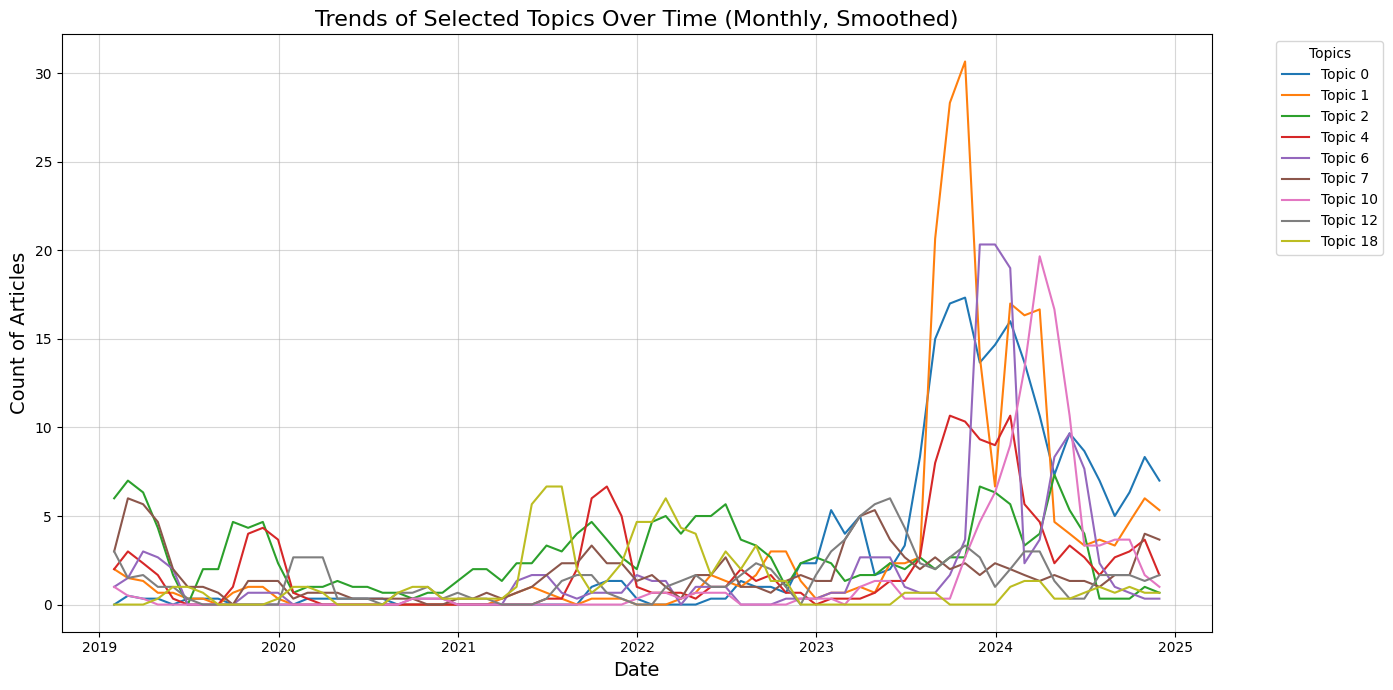

In [14]:
# Resample to monthly aggregation
topic_pivot_monthly = topic_pivot.resample('ME').sum()

# Apply a rolling mean to smooth the graph (optional)
rolling_window = 3  # Smoothing with a 3-month rolling window
topic_pivot_smoothed = topic_pivot_monthly.rolling(window=rolling_window, min_periods=1).mean()

# Plot the line graph
plt.figure(figsize=(14, 7))

for topic in selected_topics:
    if topic in topic_pivot_smoothed.columns:
        plt.plot(topic_pivot_smoothed.index, topic_pivot_smoothed[topic], label=f'Topic {topic}')

# Customize the plot
plt.title('Trends of Selected Topics Over Time (Monthly, Smoothed)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Articles', fontsize=14)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_19792/2286509740.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_pivot_monthly_filtered = topic_pivot_filtered.resample('M').sum()


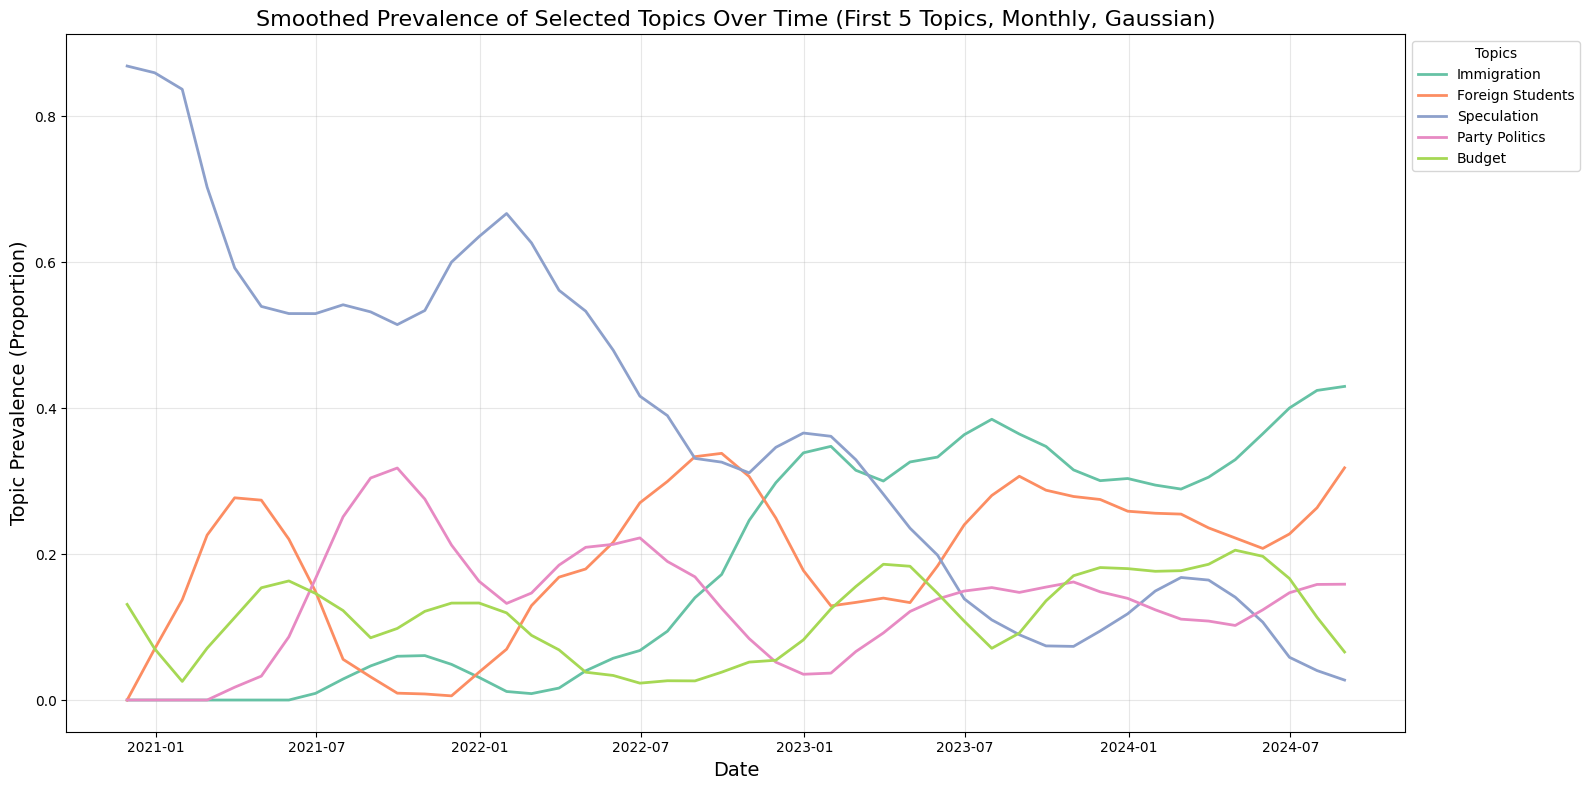

In [23]:
# Filter the topic labels to include only the first 5 topics
selected_topics = {
    0: "Immigration",
    1: "Foreign Students",
    2: "Speculation",
    4: "Party Politics",
    6: "Budget"
}

# Filter the pivot table to include only the selected topics
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[selected_topics.values()]

# Resample to monthly aggregation
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('M').sum()

# Calculate the total number of articles for each month
total_articles_monthly = topic_pivot_monthly_filtered.sum(axis=1)

# Calculate prevalence as the proportion of each topic
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='Topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='Topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Smoothed Prevalence of Selected Topics Over Time (First 5 Topics, Monthly, Gaussian)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Topic Prevalence (Proportion)', fontsize=14)
plt.legend(title='Topics', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()




/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_19792/2570532383.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_pivot_monthly_filtered = topic_pivot_filtered.resample('M').sum()


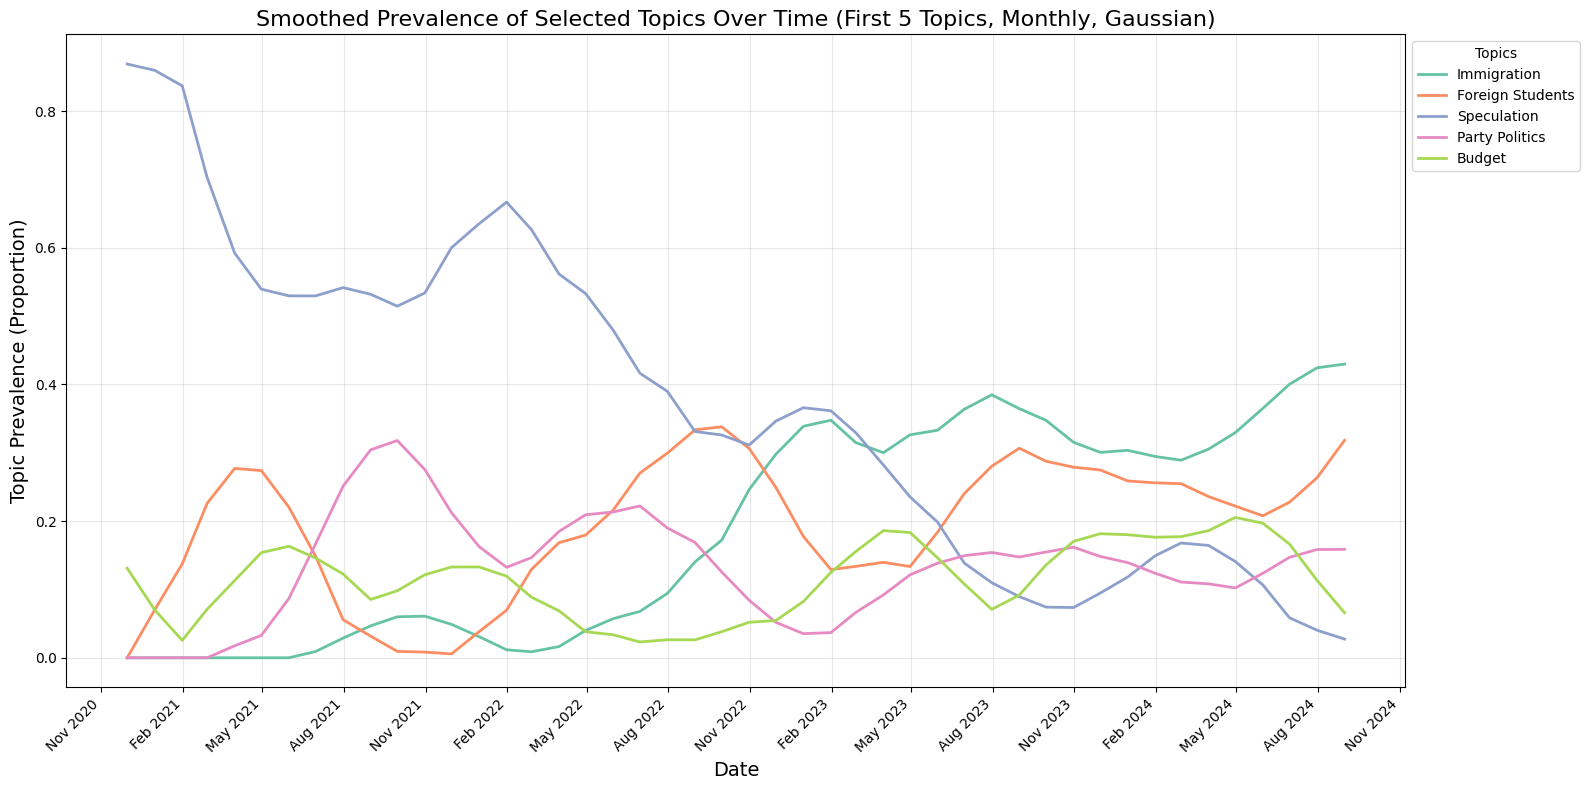

In [24]:
import matplotlib.dates as mdates

# Filter the topic labels to include only the first 5 topics
selected_topics = {
    0: "Immigration",
    1: "Foreign Students",
    2: "Speculation",
    4: "Party Politics",
    6: "Budget"
}

# Filter the pivot table to include only the selected topics
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[selected_topics.values()]

# Resample to monthly aggregation
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('M').sum()

# Calculate the total number of articles for each month
total_articles_monthly = topic_pivot_monthly_filtered.sum(axis=1)

# Calculate prevalence as the proportion of each topic
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='Topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='Topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Smoothed Prevalence of Selected Topics Over Time (First 5 Topics, Monthly, Gaussian)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Topic Prevalence (Proportion)', fontsize=14)
plt.legend(title='Topics', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()


-----

## Review of the variables

In [17]:
#load the topic data set


df_topics = pd.read_csv('/Users/stilling/Desktop/bert_topic/topic_model_full-set.csv')


In [18]:


#drop Unnamed: 0, link, rank, date_range, country and lanugaue columns
df_topics = df_topics.drop(columns=['Unnamed: 0', 'link', 'rank', 'date_range', 'country'])

df_topics.head()

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,summary_cleaned,summary_no_whitespace,summary_no_stopwords,final_classification,cleaned,topic,new_topic
0,Trudeau announces help for homeless in Vancouv...,The Canadian Press,2019-02-11,nationalpost.com,"This advertisement has not loaded yet, but you...",The Canadian Press,False,87.25351,His government is providing funding to the Van...,his government is providing funding to the van...,his government is providing funding to the van...,his government is providing funding to the van...,government providing funding vancouver afforda...,True,providing funding vancouver affordable agency ...,67,NaN
1,Trudeau announces help for Vancouver homeless ...,The Canadian Press,2019-02-12,cbc.ca,"Prime Minister Justin Trudeau, right, walks wi...",The Canadian Press,False,83.39783,"Prime Minister Justin Trudeau, right, walks wi...","prime minister justin trudeau, right, walks wi...",prime minister justin trudeau right walks with...,prime minister justin trudeau right walks with...,prime minister justin trudeau right walks rich...,True,prime trudeau right walks richard lee liberal ...,14,NaN
2,Feds to fund 3 Vancouver temporary modular hou...,The Canadian Press,2019-02-12,globalnews.ca,The federal government announced plans Monday ...,The Canadian Press,False,83.02834,The federal government announced plans Monday ...,the federal government announced plans monday ...,the federal government announced plans monday ...,the federal government announced plans monday ...,federal government announced plans monday deve...,True,federal announced plans monday develop three p...,67,NaN
3,Federal fund for rental units won't fix housin...,Robyn Miller,2019-03-20,cbc.ca,"Coun. Catherine McKenney, in orange, speaks at...",Robyn Miller,False,82.78023,"Coun. Catherine McKenney, in orange, speaks at...","coun. catherine mckenney, in orange, speaks at...",coun catherine mckenney in orange speaks at an...,coun catherine mckenney in orange speaks at an...,coun catherine mckenney orange speaks affordab...,True,coun catherine mckenney orange speaks affordab...,28,NaN
4,Governments of Canada and Ontario celebrate ne...,markets.businessinsider.com,2019-03-12,businessinsider.com,"THUNDER BAY, ON, March 12, 2019 /CNW/ - More p...",markets.businessinsider.com,False,79.50956,", , March 12, 2019 // - More people will now ...",", , march 12, 2019 // - more people will now ...",more people will now have a place to call home...,more people will now have a place to call home...,people place call home northwestern ontario fe...,True,people place call northwestern ontario federal...,42,NaN


/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/908227491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_topics, y='clean_url', order=df_topics['clean_url'].value_counts().iloc[:25].index, palette='viridis')


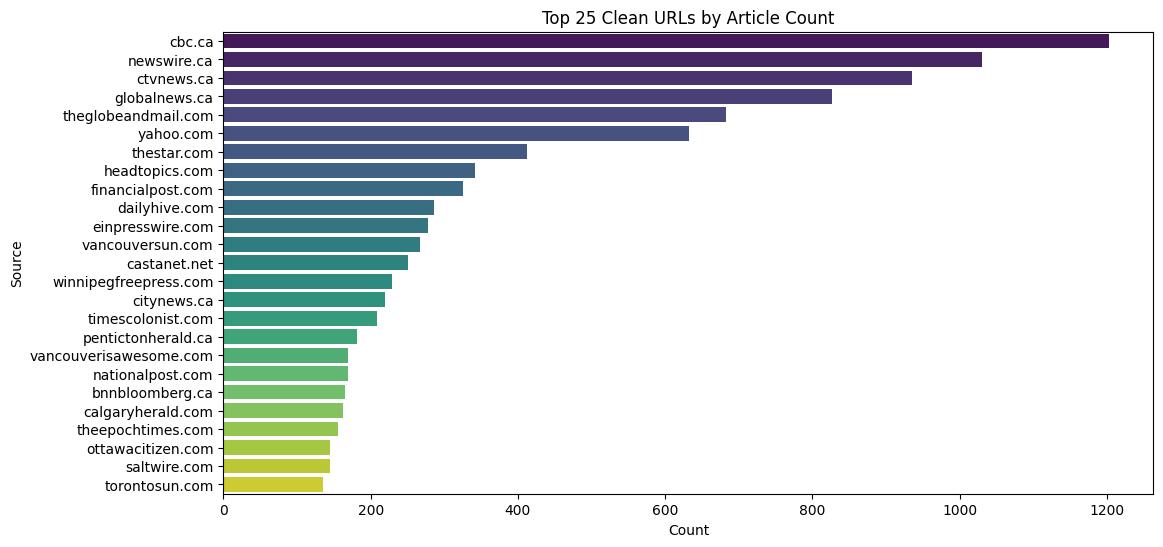

In [5]:
#use seaborn to inspect the the value counts of the clean_url column top 25
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_topics, y='clean_url', order=df_topics['clean_url'].value_counts().iloc[:25].index, palette='viridis')
plt.title('Top 25 Clean URLs by Article Count')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()



In [ ]:
#plot the distribution of the political_leaning
plt.figure(figsize=(12, 6))

In [19]:
df_sources = pd.read_csv('/Users/stilling/Desktop/1_variable_exploration/source_count_enriched.csv')

In [11]:
df_sources.head()

,clean_url,count,political_lean,location,type,ownership
0,cbc.ca,4745,1.0,Canada,Publisher,CBC
1,ctvnews.ca,3657,2.0,Canada,Publisher,Bell Media
2,theglobeandmail.com,2963,2.0,Canada,Publisher,Woodbridge
3,yahoo.com,2795,1.0,International,New aggregator,Yahoo
4,globalnews.ca,2443,1.0,Canada,Publisher,Corus entertainment


In [20]:
df_topics.head()

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,summary_cleaned,summary_no_whitespace,summary_no_stopwords,final_classification,cleaned,topic,new_topic
0,Trudeau announces help for homeless in Vancouv...,The Canadian Press,2019-02-11,nationalpost.com,"This advertisement has not loaded yet, but you...",The Canadian Press,False,87.25351,His government is providing funding to the Van...,his government is providing funding to the van...,his government is providing funding to the van...,his government is providing funding to the van...,government providing funding vancouver afforda...,True,providing funding vancouver affordable agency ...,67,NaN
1,Trudeau announces help for Vancouver homeless ...,The Canadian Press,2019-02-12,cbc.ca,"Prime Minister Justin Trudeau, right, walks wi...",The Canadian Press,False,83.39783,"Prime Minister Justin Trudeau, right, walks wi...","prime minister justin trudeau, right, walks wi...",prime minister justin trudeau right walks with...,prime minister justin trudeau right walks with...,prime minister justin trudeau right walks rich...,True,prime trudeau right walks richard lee liberal ...,14,NaN
2,Feds to fund 3 Vancouver temporary modular hou...,The Canadian Press,2019-02-12,globalnews.ca,The federal government announced plans Monday ...,The Canadian Press,False,83.02834,The federal government announced plans Monday ...,the federal government announced plans monday ...,the federal government announced plans monday ...,the federal government announced plans monday ...,federal government announced plans monday deve...,True,federal announced plans monday develop three p...,67,NaN
3,Federal fund for rental units won't fix housin...,Robyn Miller,2019-03-20,cbc.ca,"Coun. Catherine McKenney, in orange, speaks at...",Robyn Miller,False,82.78023,"Coun. Catherine McKenney, in orange, speaks at...","coun. catherine mckenney, in orange, speaks at...",coun catherine mckenney in orange speaks at an...,coun catherine mckenney in orange speaks at an...,coun catherine mckenney orange speaks affordab...,True,coun catherine mckenney orange speaks affordab...,28,NaN
4,Governments of Canada and Ontario celebrate ne...,markets.businessinsider.com,2019-03-12,businessinsider.com,"THUNDER BAY, ON, March 12, 2019 /CNW/ - More p...",markets.businessinsider.com,False,79.50956,", , March 12, 2019 // - More people will now ...",", , march 12, 2019 // - more people will now ...",more people will now have a place to call home...,more people will now have a place to call home...,people place call home northwestern ontario fe...,True,people place call northwestern ontario federal...,42,NaN


In [21]:
#take the categoriastions (political lean, location, type, ownership) from the source_count_enriched.csv file and add to the df_topics
df_topics = df_topics.merge(df_sources[['clean_url', 'political_lean', 'location', 'type', 'ownership']], on='clean_url', how='left')


In [24]:
#drop observations with australia, isreal, united arab emirates, and news aggregator in the location column
df_topics = df_topics[~df_topics['location'].isin(['Australia', 'Isreal', 'United Arab Emirates', 'News aggregator'])]


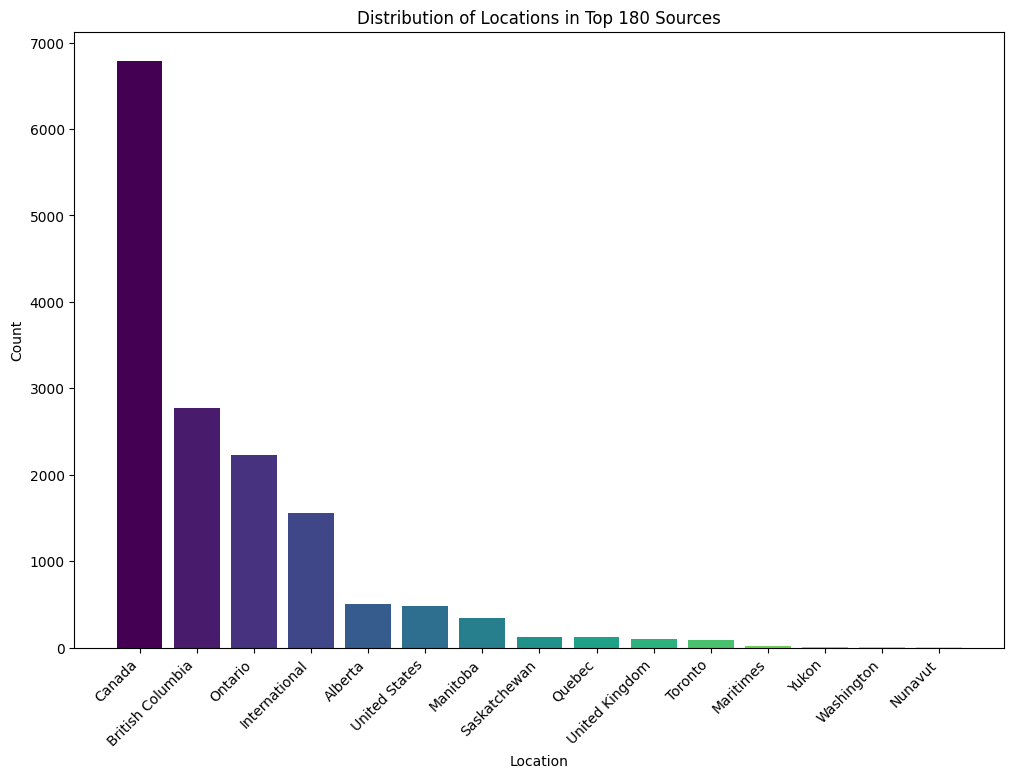

In [25]:
# Group by location and count occurrences
location_distribution = df_topics['location'].value_counts()
import matplotlib.cm as cm
import numpy as np

# Generate a unique color for each location using a colormap
colors = cm.viridis(np.linspace(0, 1, len(location_distribution)))
# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(location_distribution.index, location_distribution.values, color=colors)
plt.title("Distribution of Locations in Top 180 Sources")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [35]:
max_topic = df_topics['topic'].max()
print(max_topic)


207


In [65]:
#drop topic and new_topic final_topic
#df_topics = df_topics.drop(columns=['new_topic_adjusted'])


df_topics.head(50)

#save the final data set
df_topics.to_csv('/Users/stilling/Desktop/analysis/v2_final_analysis.csv', index=False)

In [202]:
df_analysis = pd.read_csv('/Users/stilling/Desktop/analysis/v2_final_analysis.csv')

In [203]:
#drop duplicates
df_analysis = df_analysis.drop_duplicates(subset=['title', 'clean_url'])

In [204]:
df_analysis.shape

(13006, 22)

/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/4007433704.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_article_counts = df_analysis.resample('M', on='published_date').size()


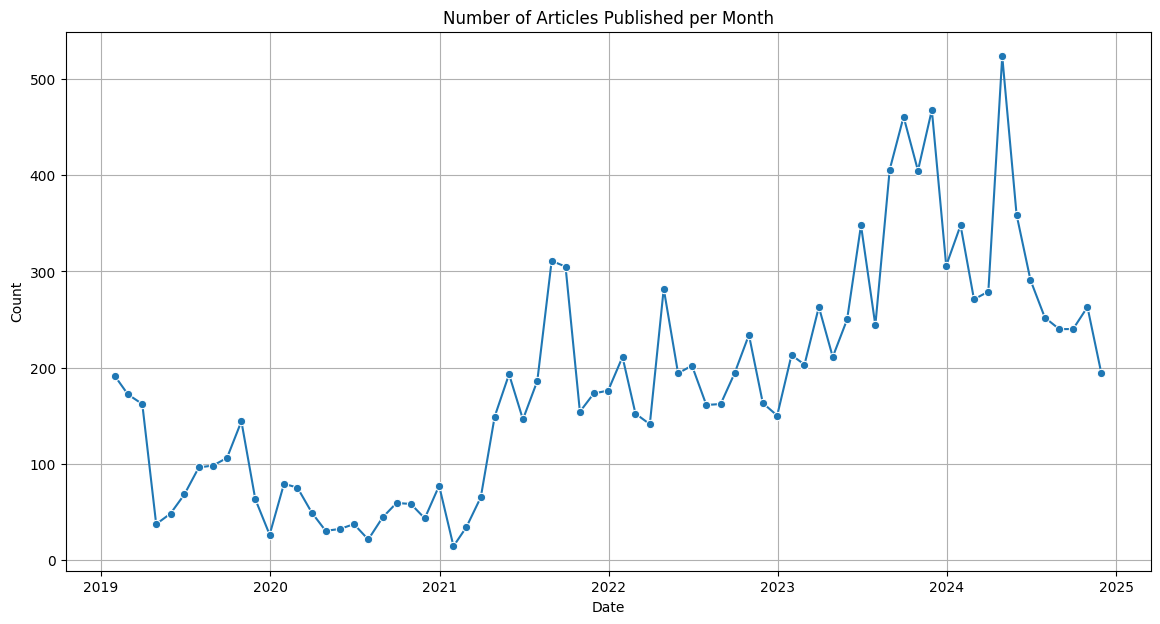

In [205]:
#line plot of the number of articles per month using the published_date column using seaborn
import seaborn as sns

df_analysis['published_date'] = pd.to_datetime(df_analysis['published_date'])

# Group by month and count occurrences
monthly_article_counts = df_analysis.resample('M', on='published_date').size()
# Plot the line graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_article_counts, marker='o')
plt.title('Number of Articles Published per Month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [206]:
df_analysis['published_date'] = pd.to_datetime(df_analysis['published_date'])

df_analysis.head()

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
0,Trudeau announces help for homeless in Vancouv...,The Canadian Press,2019-02-11,nationalpost.com,"This advertisement has not loaded yet, but you...",The Canadian Press,False,87.25351,His government is providing funding to the Van...,his government is providing funding to the van...,...,government providing funding vancouver afforda...,True,providing funding vancouver affordable agency ...,3.0,Canada,"Publisher, Syndication",Postmedia,67_trudeau_renttoown_prime_innovation,67,67_trudeau_renttoown_prime_innovation
1,Trudeau announces help for Vancouver homeless ...,The Canadian Press,2019-02-12,cbc.ca,"Prime Minister Justin Trudeau, right, walks wi...",The Canadian Press,False,83.39783,"Prime Minister Justin Trudeau, right, walks wi...","prime minister justin trudeau, right, walks wi...",...,prime minister justin trudeau right walks rich...,True,prime trudeau right walks richard lee liberal ...,1.0,Canada,Publisher,CBC,14_singh_burnaby_jagmeet_leader,14,14_singh_burnaby_jagmeet_leader
2,Feds to fund 3 Vancouver temporary modular hou...,The Canadian Press,2019-02-12,globalnews.ca,The federal government announced plans Monday ...,The Canadian Press,False,83.02834,The federal government announced plans Monday ...,the federal government announced plans monday ...,...,federal government announced plans monday deve...,True,federal announced plans monday develop three p...,1.0,Canada,Publisher,Corus entertainment,67_trudeau_renttoown_prime_innovation,67,67_trudeau_renttoown_prime_innovation
3,Federal fund for rental units won't fix housin...,Robyn Miller,2019-03-20,cbc.ca,"Coun. Catherine McKenney, in orange, speaks at...",Robyn Miller,False,82.78023,"Coun. Catherine McKenney, in orange, speaks at...","coun. catherine mckenney, in orange, speaks at...",...,coun catherine mckenney orange speaks affordab...,True,coun catherine mckenney orange speaks affordab...,1.0,Canada,Publisher,CBC,28_ottawa_citizen_lansdowne_pugliese,28,28_ottawa_citizen_lansdowne_pugliese
4,Governments of Canada and Ontario celebrate ne...,markets.businessinsider.com,2019-03-12,businessinsider.com,"THUNDER BAY, ON, March 12, 2019 /CNW/ - More p...",markets.businessinsider.com,False,79.50956,", , March 12, 2019 // - More people will now ...",", , march 12, 2019 // - more people will now ...",...,people place call home northwestern ontario fe...,True,people place call northwestern ontario federal...,1.0,Canada,Publisher,Axel Springer,42_windsor_peterborough_ontario_priorities,42,42_windsor_peterborough_ontario_priorities


In [110]:
df_analysis.shape

(13006, 22)

/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/3271867863.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_pivot_monthly = topic_pivot.resample('M').sum()


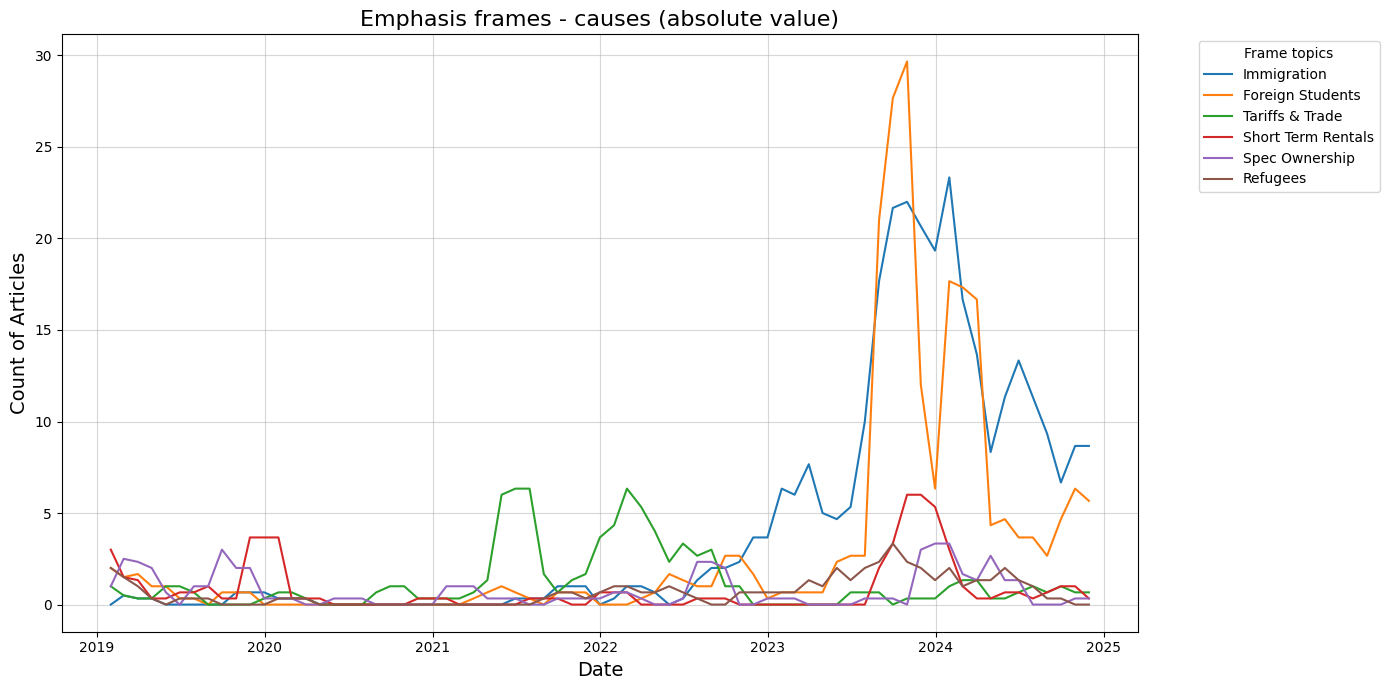

In [207]:
# Create a pivot table that counts the number of articles for each topic and date
topic_pivot = df_analysis.pivot_table(
    index='published_date',          # Rows: dates
    columns='final_topic',  # Columns: topics
    aggfunc='size',        # Count rows (articles) for each topic and date
    fill_value=0           # Fill missing values with 0
)

# Resample to monthly aggregation
topic_pivot_monthly = topic_pivot.resample('M').sum()

# Apply a rolling mean to smooth the graph (optional)
rolling_window = 3  # Smoothing with a 3-month rolling window
topic_pivot_smoothed = topic_pivot_monthly.rolling(window=rolling_window, min_periods=1).mean()

# Define topic labels
topic_labels = {
    1: 'Immigration',
    2: 'Foreign Students',
    22: 'Tariffs & Trade',
    33: 'Short Term Rentals',
    37: 'Spec Ownership',
    47: 'Refugees'
}

# Selected topics to plot (from topic_labels)
selected_topics = list(topic_labels.keys())

# Plot the line graph
plt.figure(figsize=(14, 7))

for topic in selected_topics:
    if topic in topic_pivot_smoothed.columns:
        plt.plot(
            topic_pivot_smoothed.index,
            topic_pivot_smoothed[topic],
            label=topic_labels.get(topic, f'Topic {topic}')  # Use label if available
        )

# Customize the plot
plt.title('Emphasis frames - causes (absolute value)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Articles', fontsize=14)
plt.legend(title='Frame topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()



/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/3859533767.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_pivot_monthly = topic_pivot.resample('M').sum()


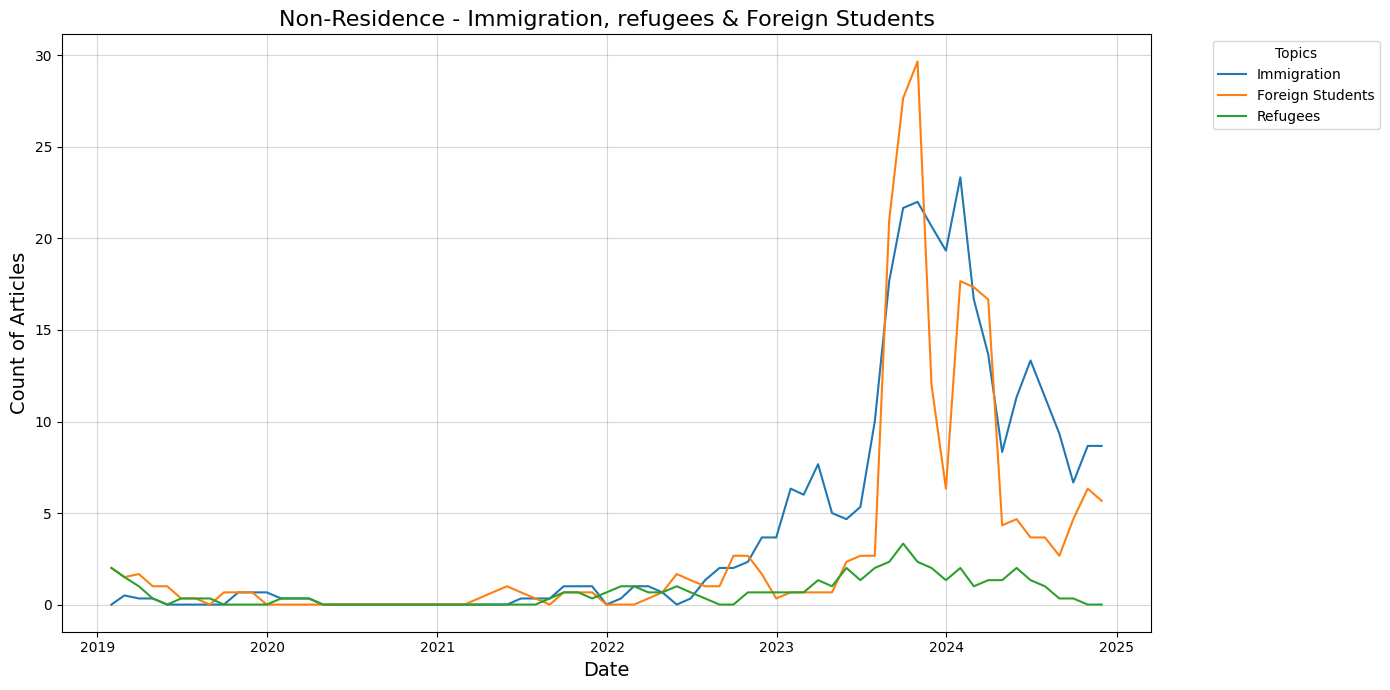

In [208]:
# Create a pivot table that counts the number of articles for each topic and date
topic_pivot = df_analysis.pivot_table(
    index='published_date',          # Rows: dates
    columns='final_topic',  # Columns: topics
    aggfunc='size',        # Count rows (articles) for each topic and date
    fill_value=0           # Fill missing values with 0
)

# Resample to monthly aggregation
topic_pivot_monthly = topic_pivot.resample('M').sum()

# Apply a rolling mean to smooth the graph (optional)
rolling_window = 3  # Smoothing with a 3-month rolling window
topic_pivot_smoothed = topic_pivot_monthly.rolling(window=rolling_window, min_periods=1).mean()

# Define topic labels
topic_labels = {
    1: 'Immigration',
    2: 'Foreign Students',
    47: 'Refugees'
}

# Selected topics to plot (from topic_labels)
selected_topics = list(topic_labels.keys())

# Plot the line graph
plt.figure(figsize=(14, 7))

for topic in selected_topics:
    if topic in topic_pivot_smoothed.columns:
        plt.plot(
            topic_pivot_smoothed.index,
            topic_pivot_smoothed[topic],
            label=topic_labels.get(topic, f'Topic {topic}')  # Use label if available
        )

# Customize the plot
plt.title('Non-Residence - Immigration, refugees & Foreign Students', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Articles', fontsize=14)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

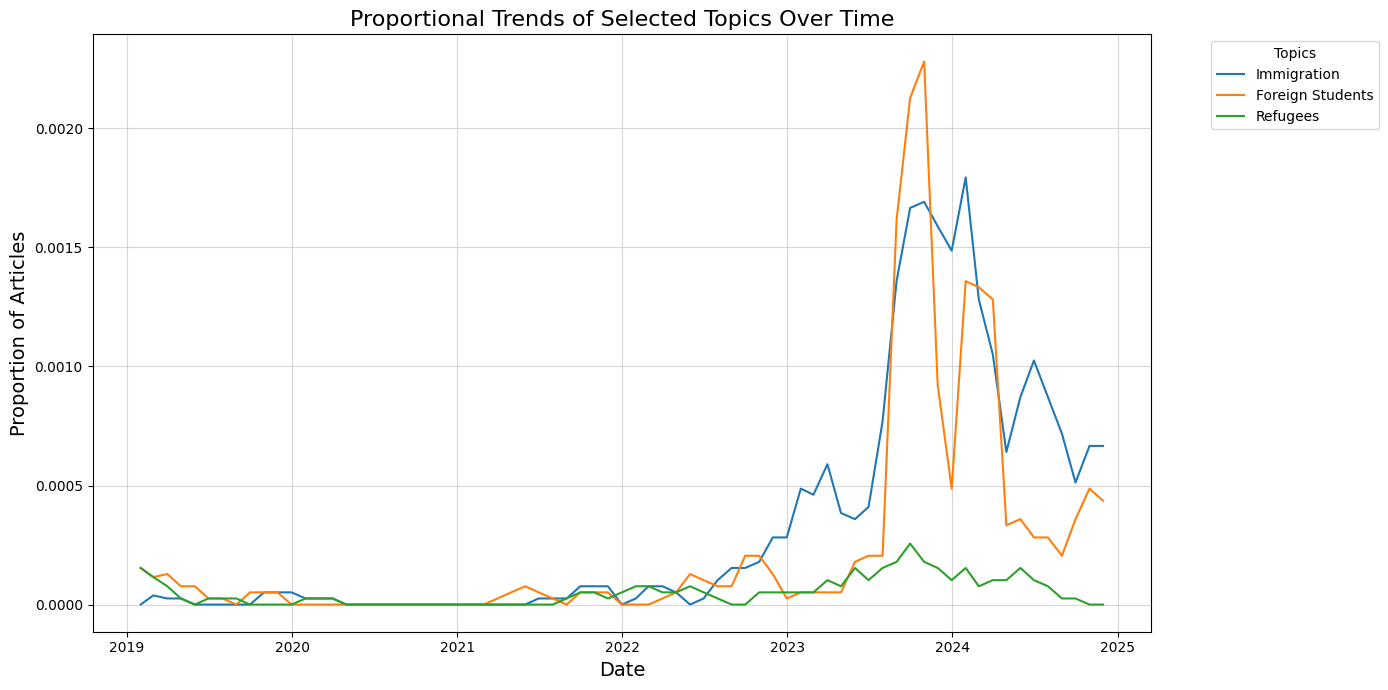

In [209]:
# Normalize by total articles (13006)
topic_pivot_proportional = topic_pivot_monthly / 13006

# Smooth the data with a rolling mean (optional)
rolling_window = 3
topic_pivot_smoothed = topic_pivot_proportional.rolling(window=rolling_window, min_periods=1).mean()

# Define topic labels
topic_labels = {
   1: 'Immigration',
    2: 'Foreign Students',
    47: 'Refugees'
}

# Selected topics to plot
selected_topics = list(topic_labels.keys())

# Plot the proportional trends
plt.figure(figsize=(14, 7))

for topic in selected_topics:
    if topic in topic_pivot_smoothed.columns:
        plt.plot(
            topic_pivot_smoothed.index,
            topic_pivot_smoothed[topic],
            label=topic_labels.get(topic, f'Topic {topic}')
        )

# Customize the plot
plt.title('Proportional Trends of Selected Topics Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Proportion of Articles', fontsize=14)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

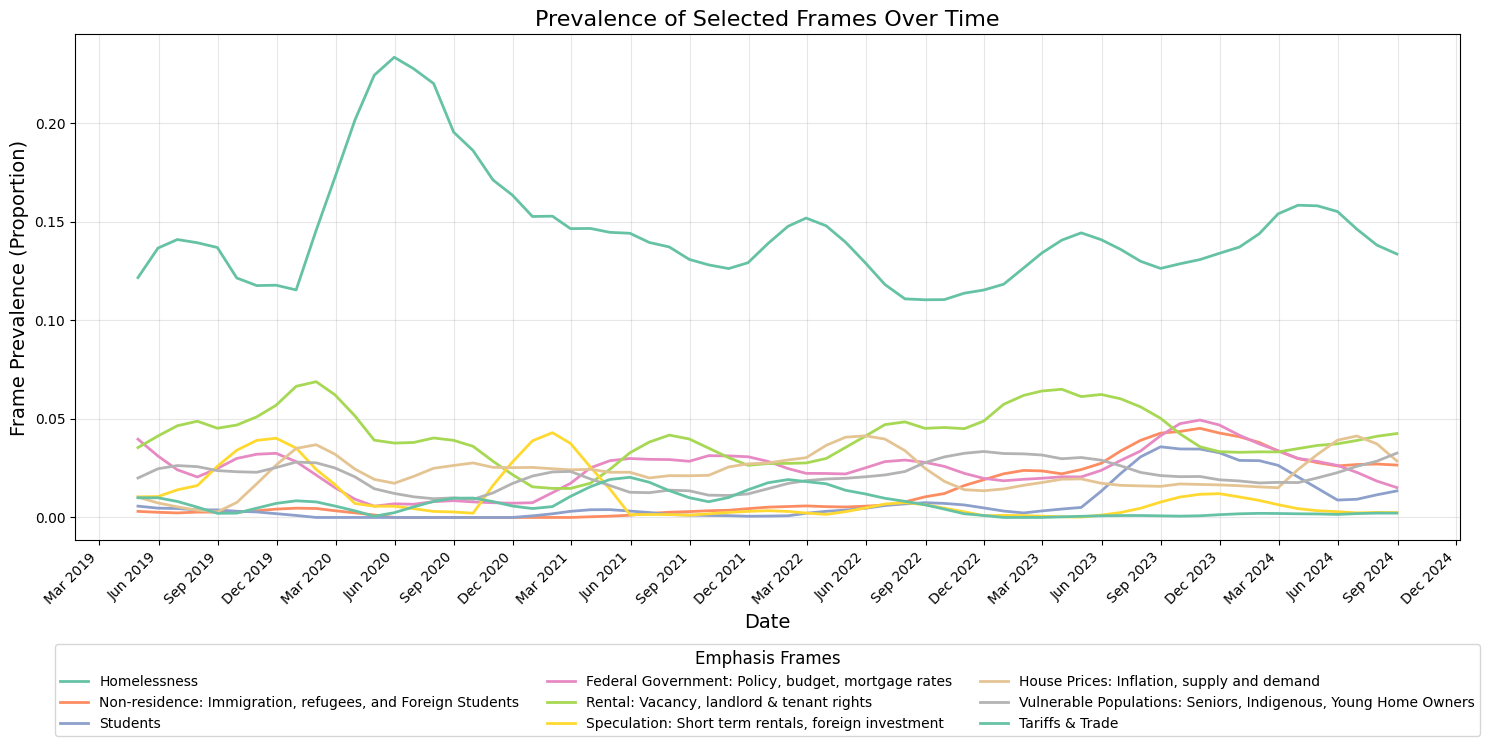

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    0: 'Homelessness',  # Added Homelessness as its own topic
    1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    2: 'Students', # Students as its own topic
    3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Selected Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()


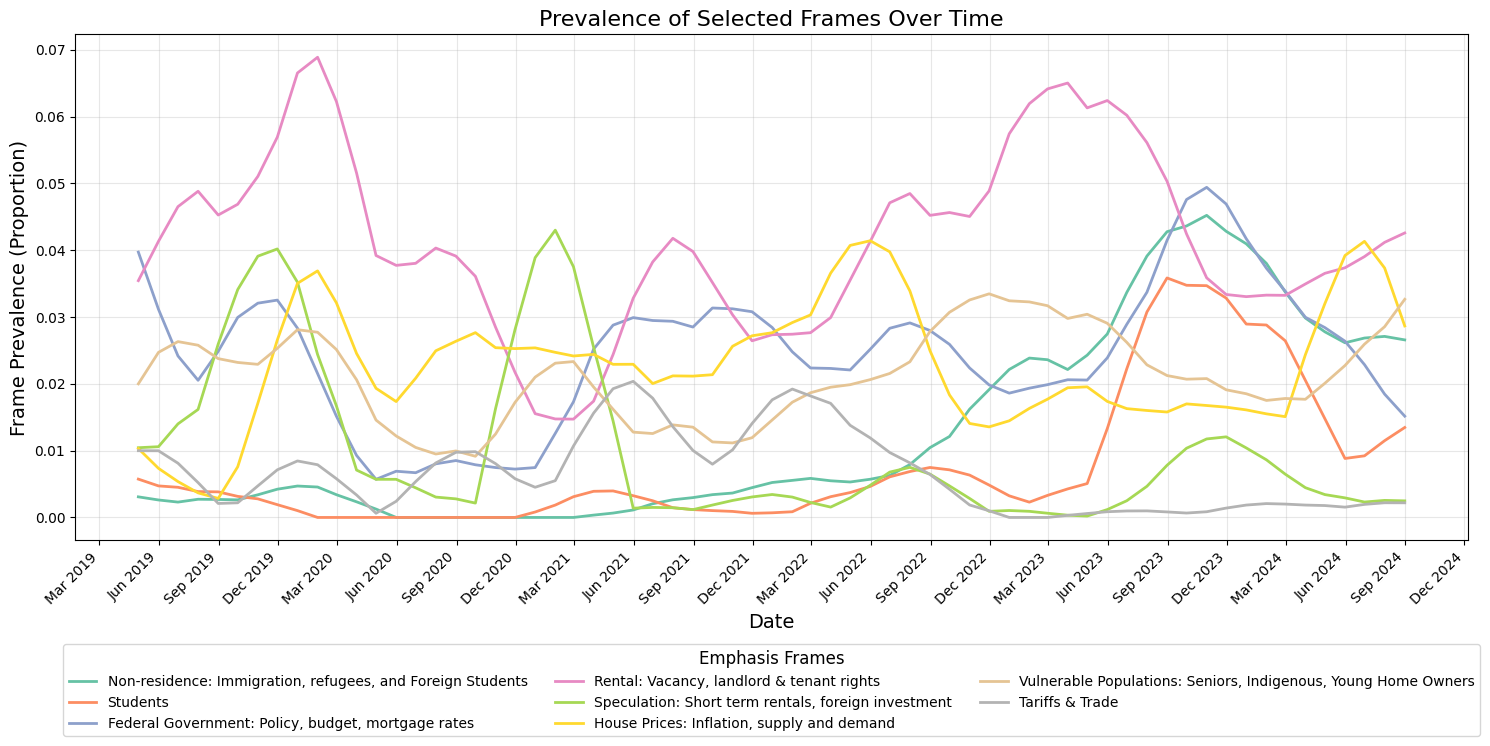

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
#topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    #0: 'Homelessness',  # Added Homelessness as its own topic
    1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    2: 'Students', # Students as its own topic
    3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Selected Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()


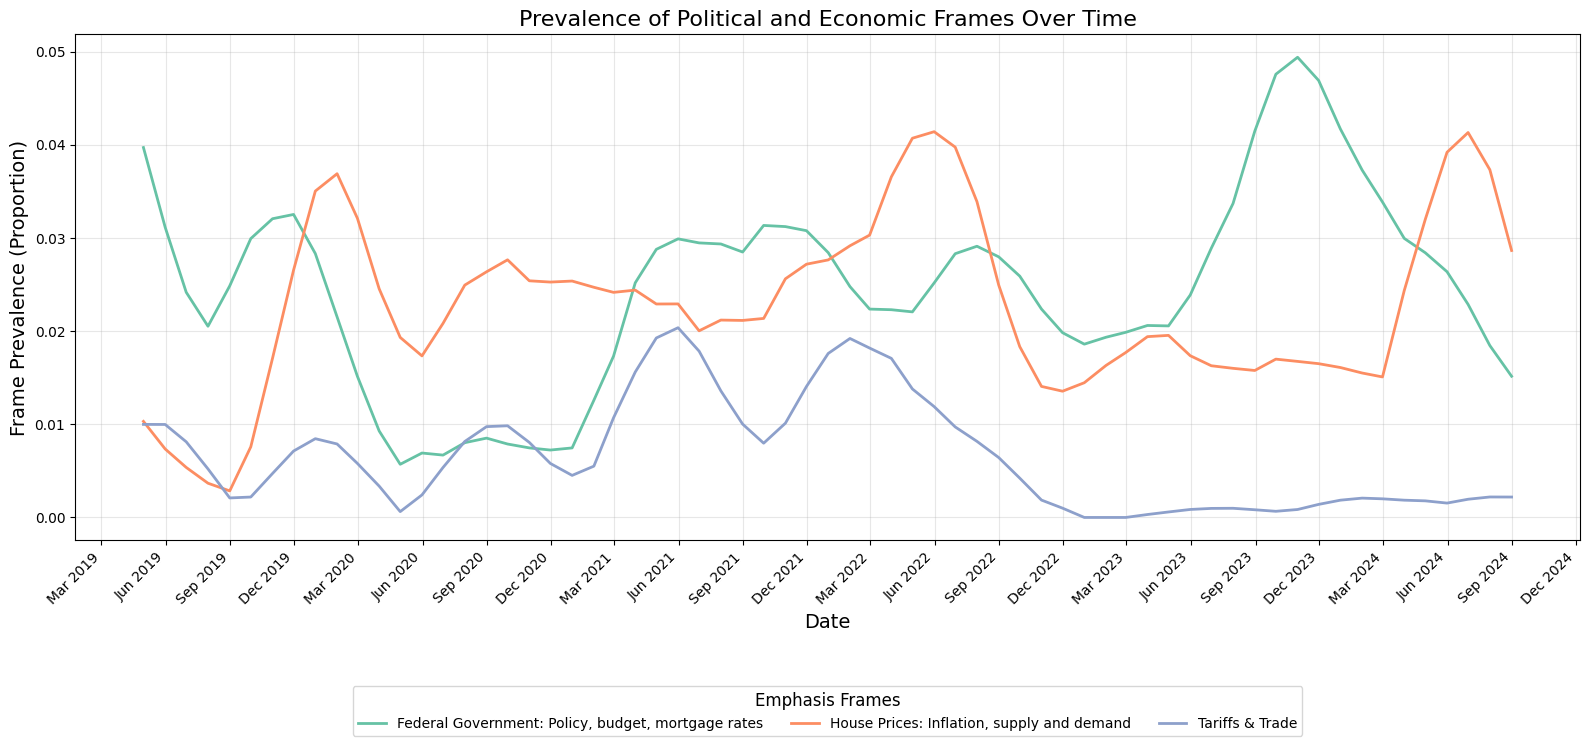

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
#topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
#topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
#topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
#topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
#topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
#topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
#topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
#topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
#topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
#topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 22 (Tariffs & Trade) 
topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    #0: 'Homelessness',  # Added Homelessness as its own topic
    #1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    #2: 'Students', # Students as its own topic
    3: 'Federal Government: Policy, budget, mortgage rates',
    #4: 'Rental: Vacancy, landlord & tenant rights',
    #26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    #12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Political and Economic Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()


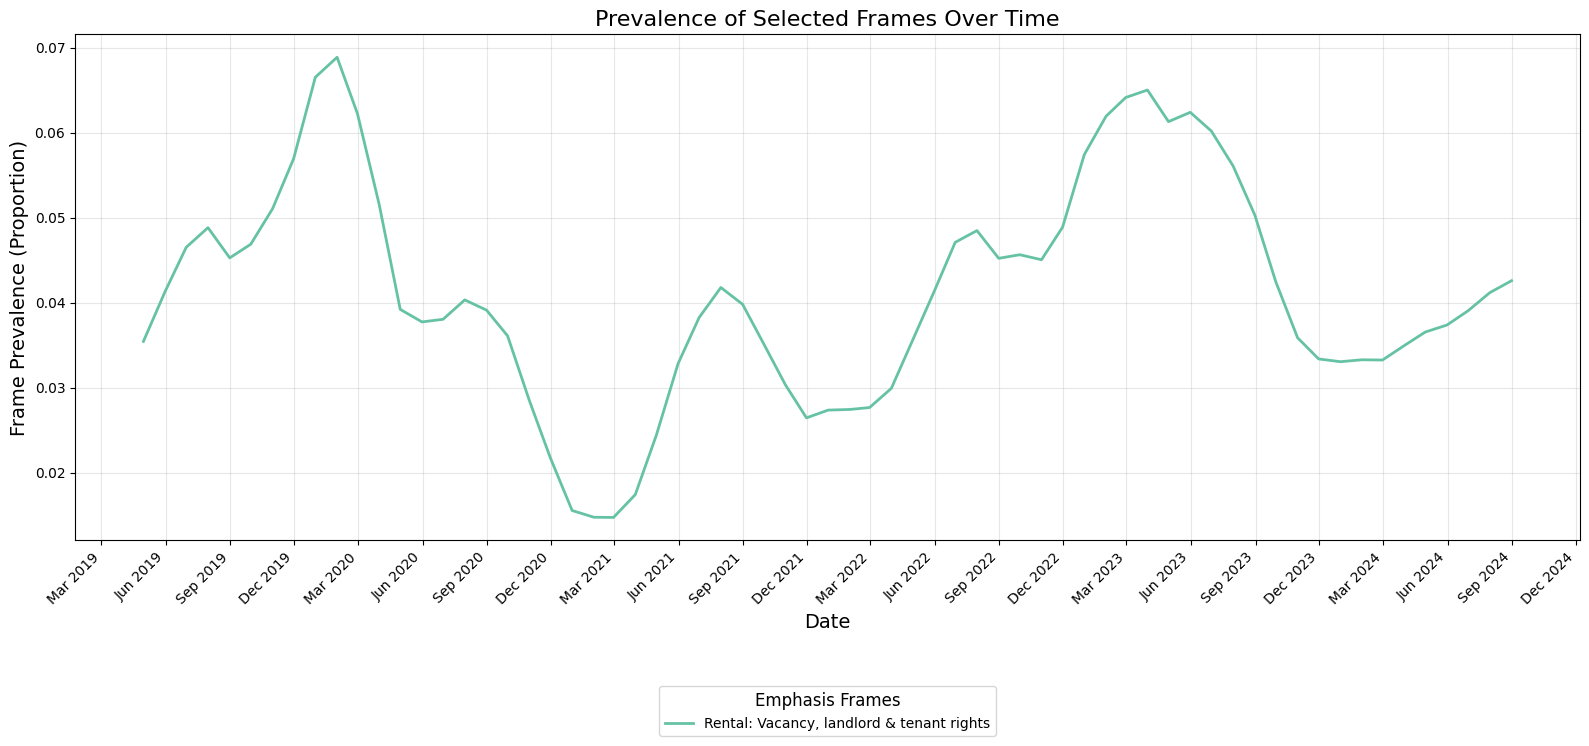

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
#topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
#topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
#topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
#topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
#topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
#topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
#topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
#topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
#topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
#topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
#topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
#topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 22 (Tariffs & Trade) 
#topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    #0: 'Homelessness',  # Added Homelessness as its own topic
    #1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    #2: 'Students', # Students as its own topic
    #3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    #26: 'Speculation: Short term rentals, foreign investment',
    #37: 'House Prices: Inflation, supply and demand',
    #12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    #22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Selected Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()


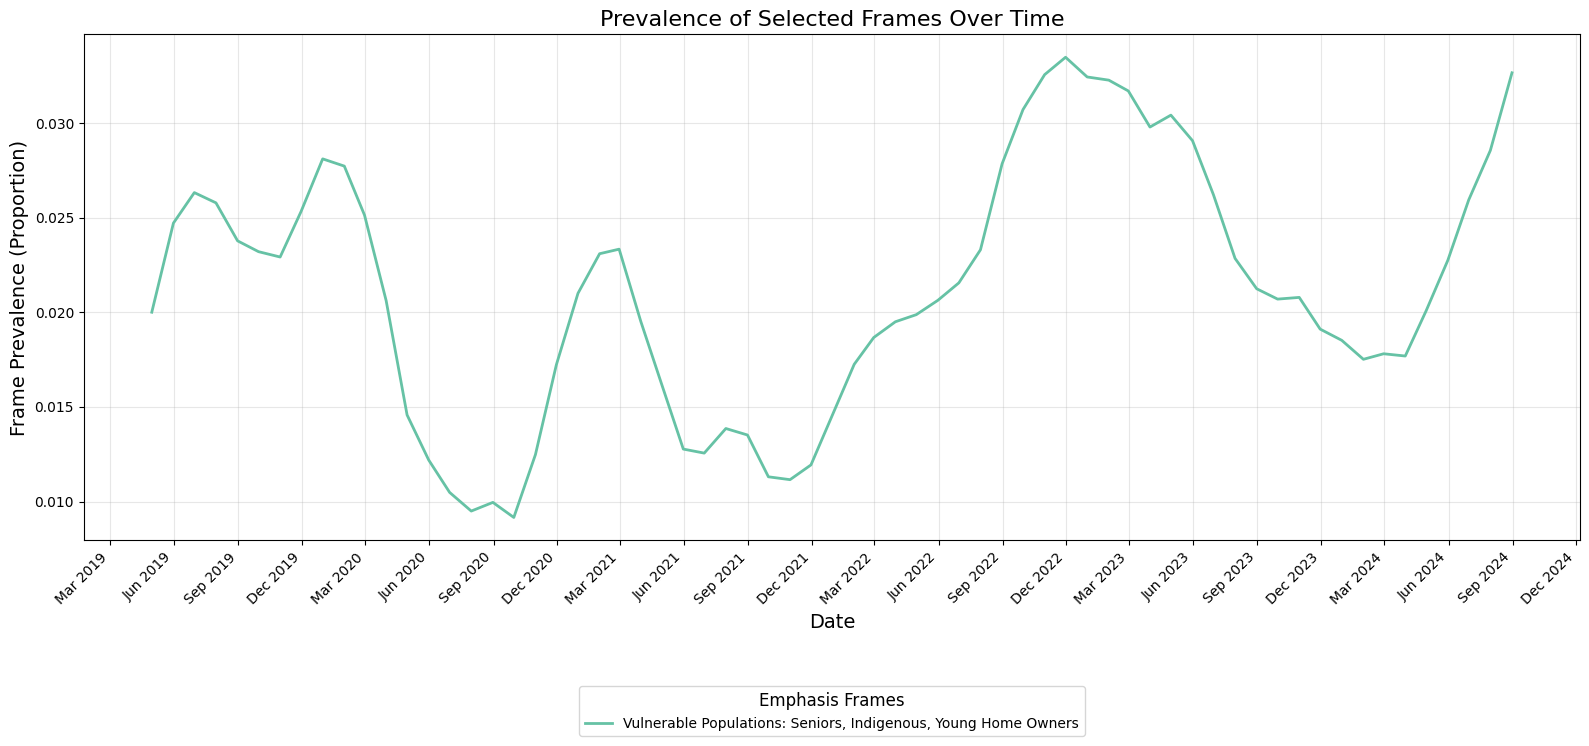

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
#topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
#topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
#topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
#topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
#topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
#topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
#topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
#topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
#topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
#topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
#topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
#topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 22 (Tariffs & Trade) 
#topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    #0: 'Homelessness',  # Added Homelessness as its own topic
    #1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    #2: 'Students', # Students as its own topic
    #3: 'Federal Government: Policy, budget, mortgage rates',
    #4: 'Rental: Vacancy, landlord & tenant rights',
    #26: 'Speculation: Short term rentals, foreign investment',
    #37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    #22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Selected Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()

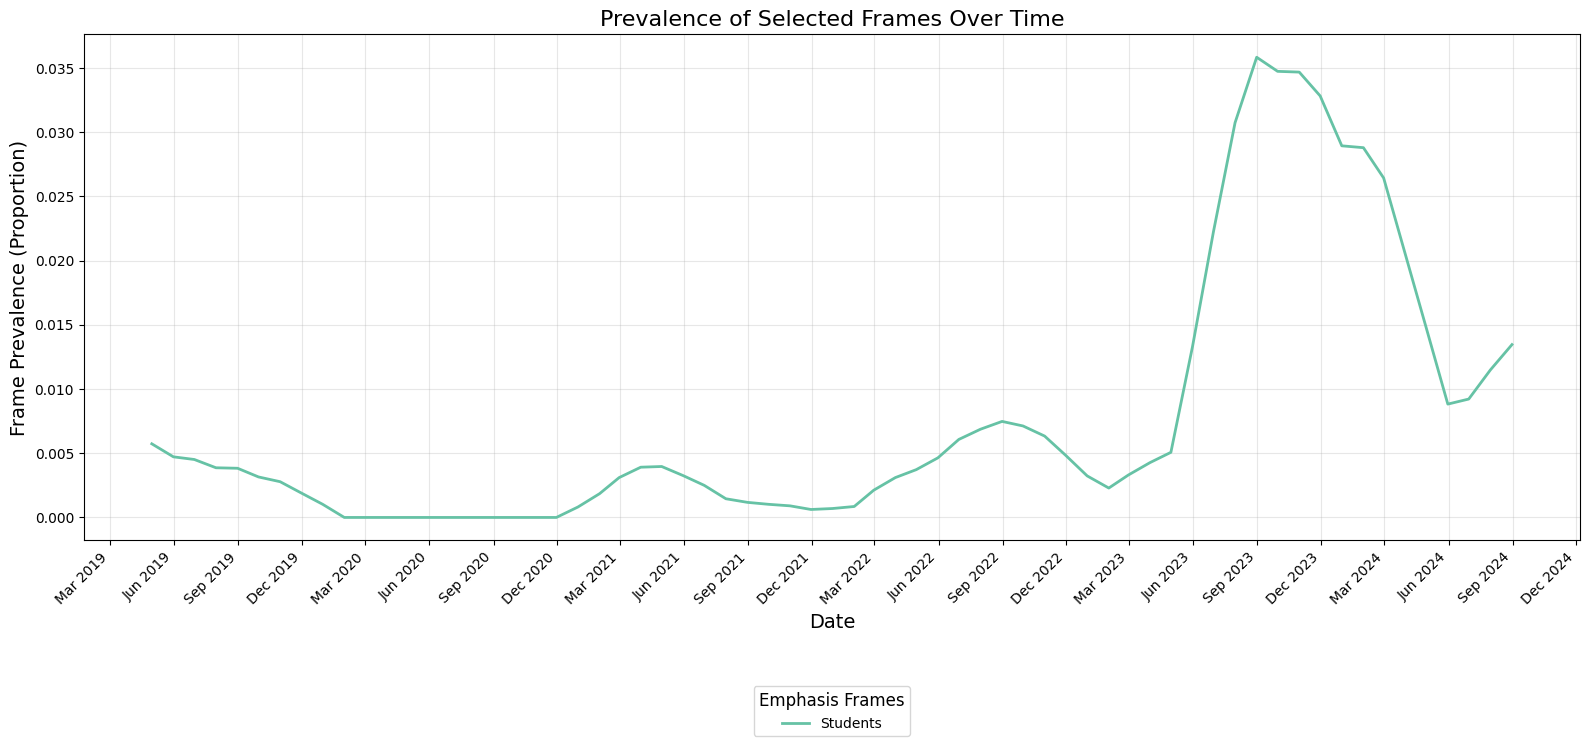

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
#topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
#topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
#topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
#topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
#topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
#topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
#topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
#topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
#topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
#topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
#topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
#topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
#topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 22 (Tariffs & Trade) 
#topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    #0: 'Homelessness',  # Added Homelessness as its own topic
    #1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    2: 'Students', # Students as its own topic
    #3: 'Federal Government: Policy, budget, mortgage rates',
    #4: 'Rental: Vacancy, landlord & tenant rights',
    #26: 'Speculation: Short term rentals, foreign investment',
    #37: 'House Prices: Inflation, supply and demand',
    #12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    #22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=topic_prevalence_long,
    x='published_date',
    y='Prevalence',
    hue='final_topic',
    palette='Set2',
    linewidth=2
)

# Customize the plot
plt.title('Prevalence of Selected Frames Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Frame Prevalence (Proportion)', fontsize=14)
plt.grid(alpha=0.3)

# Move the legend below the graph with more vertical spacing
plt.legend(
    title='Emphasis Frames',  # Title of the legend
    loc='lower center',  # Place legend below the graph
    bbox_to_anchor=(0.5, -0.4),  # Center horizontally, move further down
    ncol=3,  # Spread legend across 3 columns
    fontsize=10,
    title_fontsize=12
)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

plt.tight_layout()

# Show the plot
plt.show()

In [147]:
#load the housing index data set
df_housing = pd.read_csv('/Users/stilling/Desktop/analysis/housing_index.csv')

In [148]:
df_housing

,Quarter,Year,INDINF_NHPI_Q,INDINF_AFFORD
0,Q1,2019,0.0,0.366
1,Q2,2019,0.0,0.352
2,Q3,2019,-0.3,0.355
3,Q4,2019,0.0,0.361
4,Q1,2020,0.5,0.362
5,Q2,2020,1.1,0.316
6,Q3,2020,2.4,0.330
7,Q4,2020,4.4,0.353
8,Q1,2021,6.8,0.354
9,Q2,2021,11.0,0.380


/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/2975824405.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_housing['year'] = pd.to_datetime(df_housing['Year'].astype(str) + '-' +


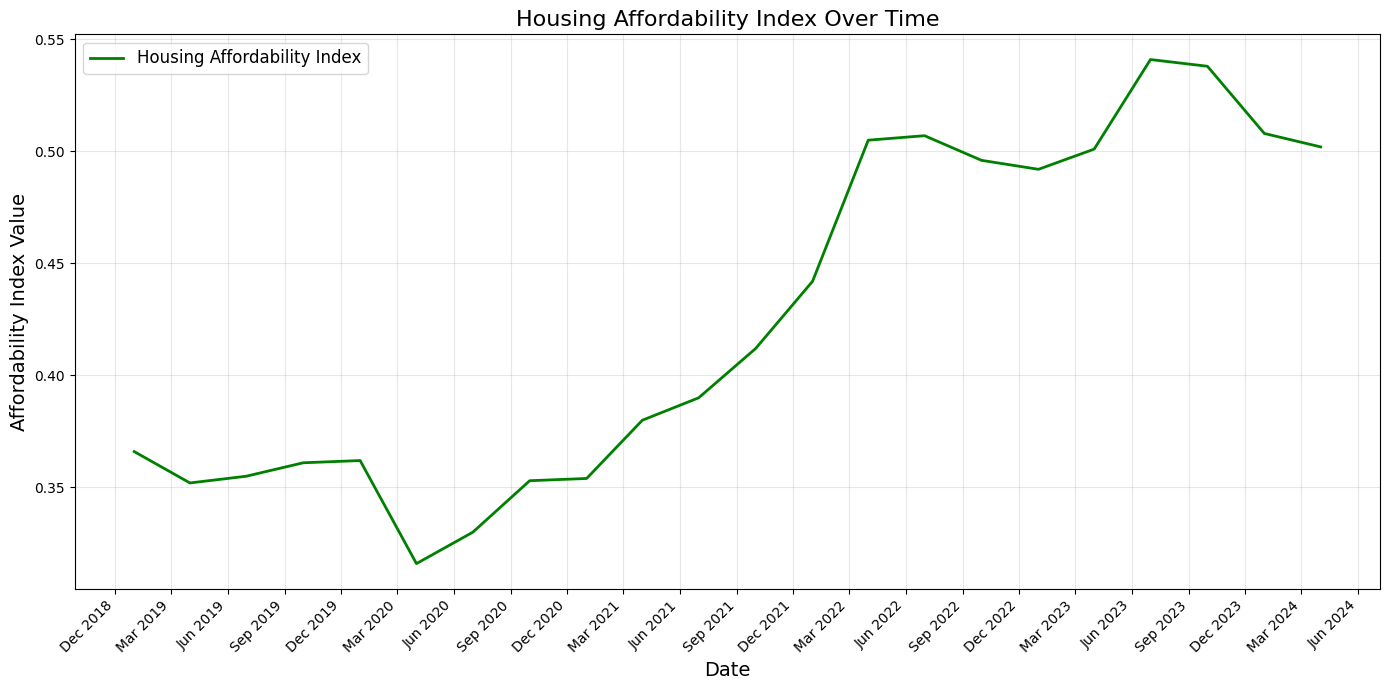

In [150]:
# Convert 'Quarter' and 'Year' into a proper datetime
df_housing['year'] = pd.to_datetime(df_housing['Year'].astype(str) + '-' +
                                    df_housing['Quarter'].str.replace('Q', 'Q').astype(str))
df_housing.set_index('year', inplace=True)

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Housing Affordability
plt.plot(
    df_housing.index,
    df_housing['INDINF_AFFORD'],
    label='Housing Affordability Index',
    color='green',
    linestyle='-',
    linewidth=2
)

# Customize the plot
plt.title('Housing Affordability Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Affordability Index Value', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# Format the x-axis to show readable date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


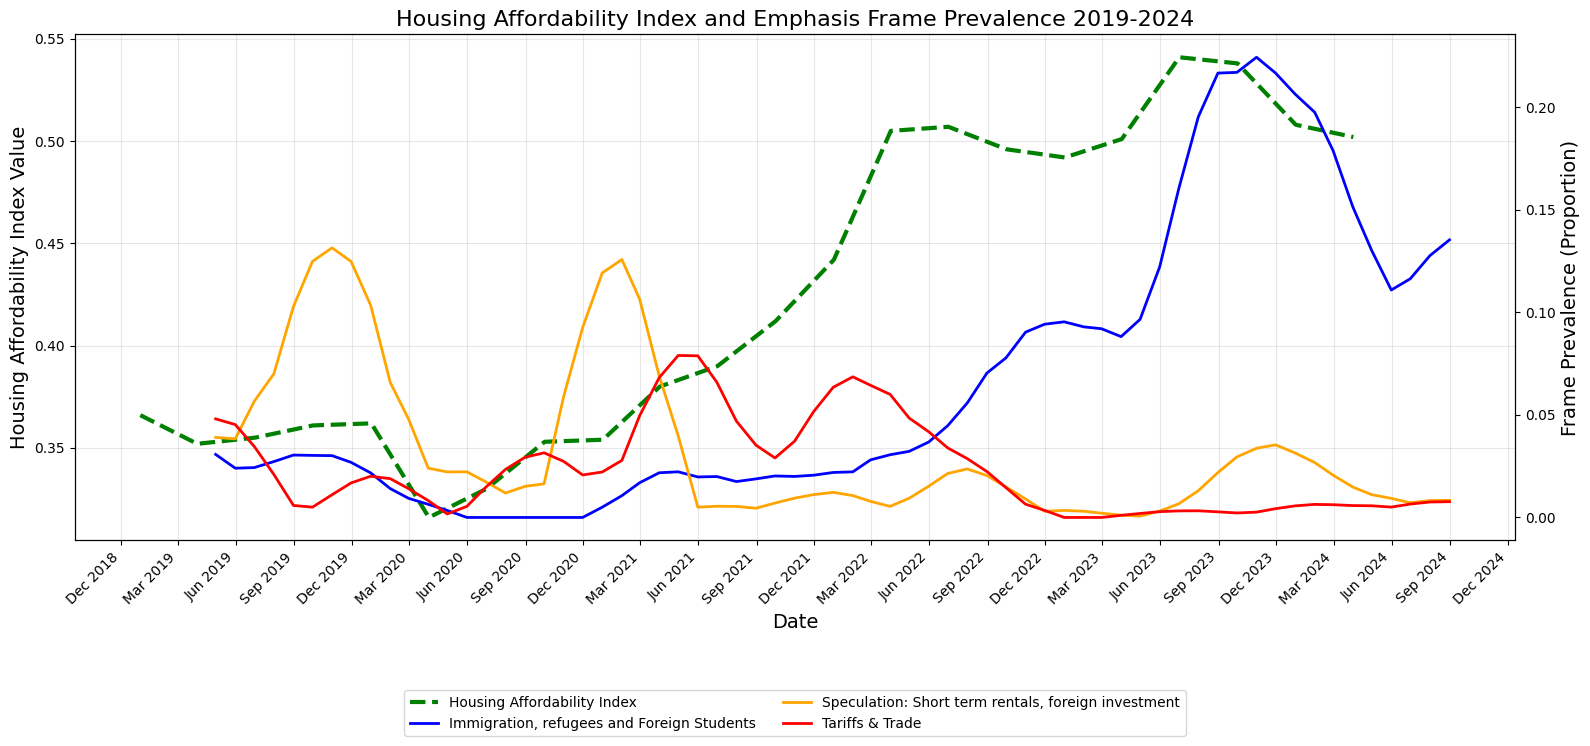

In [225]:
# Plotting the combined graph
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the Housing Affordability Index on the first y-axis
ax1.plot(
    df_housing.index,
    df_housing['INDINF_AFFORD'],
    label='Housing Affordability Index',
    color='green',
    linestyle='--',
    linewidth=3
)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Housing Affordability Index Value', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')

# Add grid for readability
ax1.grid(alpha=0.3)

# Create a second y-axis for the topic prevalence
ax2 = ax1.twinx()

# Plot the topic prevalence on the second y-axis
for topic, color in zip(['Immigration, refugees and Foreign Students',
                         'Speculation: Short term rentals, foreign investment',
                         'Tariffs & Trade'],
                        ['blue', 'orange', 'red']):
    ax2.plot(
        topic_prevalence_long[topic_prevalence_long['final_topic'] == topic]['published_date'],
        topic_prevalence_long[topic_prevalence_long['final_topic'] == topic]['Prevalence'],
        label=topic,
        linewidth=2,
        color=color
    )

# Customize the second y-axis
ax2.set_ylabel('Frame Prevalence (Proportion)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Consolidate all legends into one below the graph
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),  # Position below the graph
    ncol=2,  # Adjust columns for readability
    fontsize=10,
    title_fontsize=12
)

# Add title
plt.title('Housing Affordability Index and Emphasis Frame Prevalence 2019-2024', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/922501009.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_housing['year'] = pd.to_datetime(df_housing['Year'].astype(str) + '-' +


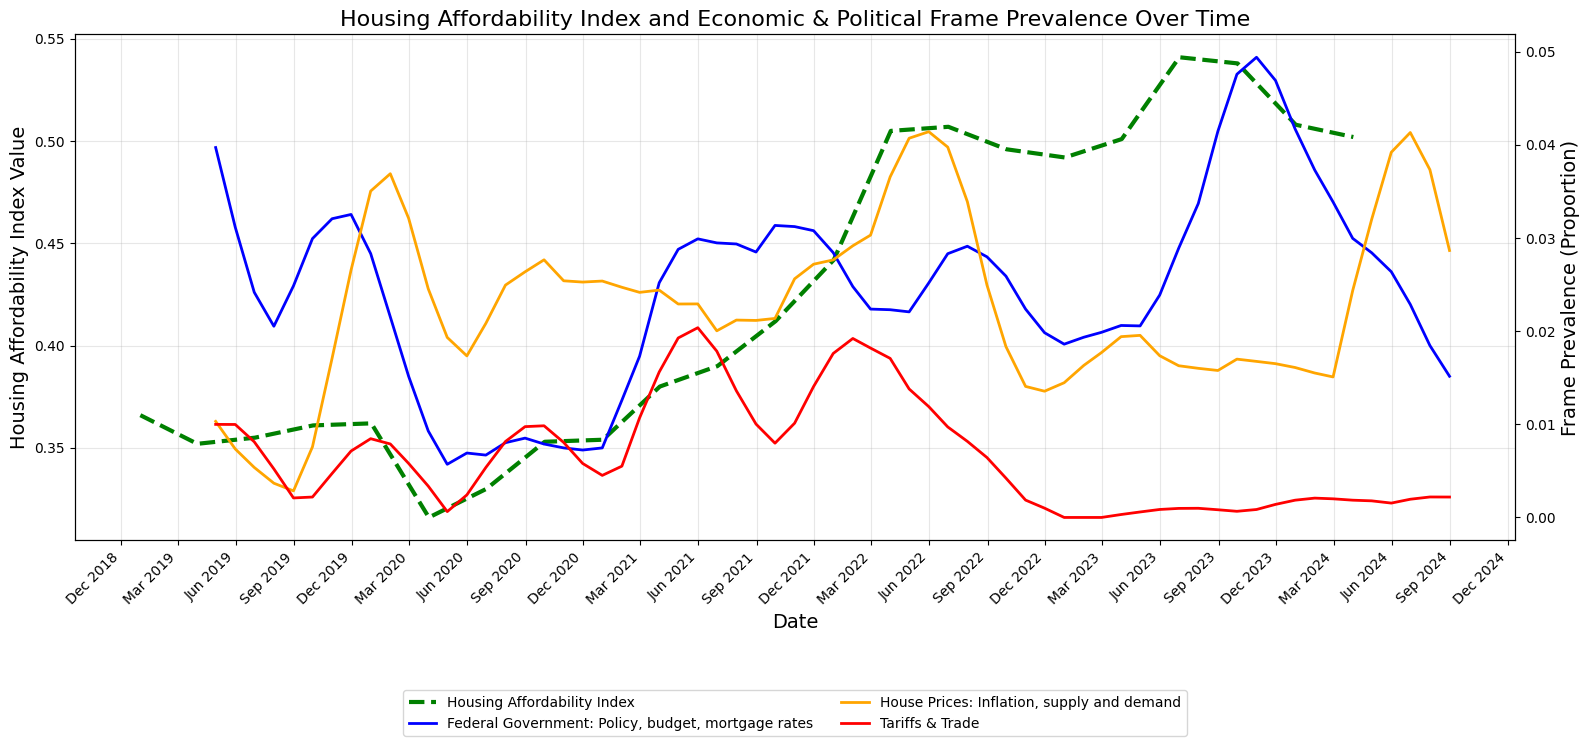

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format for topic data
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Define topic labels for filtering
topic_labels = {
    3: 'Federal Government: Policy, budget, mortgage rates',
    37: 'House Prices: Inflation, supply and demand',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Convert 'Quarter' and 'Year' into a proper datetime for housing data
df_housing['year'] = pd.to_datetime(df_housing['Year'].astype(str) + '-' +
                                     df_housing['Quarter'].str.replace('Q', 'Q').astype(str))
df_housing.set_index('year', inplace=True)

# Plotting the combined graph
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the Housing Affordability Index on the first y-axis
ax1.plot(
    df_housing.index,
    df_housing['INDINF_AFFORD'],
    label='Housing Affordability Index',
    color='green',
    linestyle='--',
    linewidth=3
)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Housing Affordability Index Value', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format the x-axis for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')

# Add grid for readability
ax1.grid(alpha=0.3)

# Create a second y-axis for the topic prevalence
ax2 = ax1.twinx()

# Plot the topic prevalence on the second y-axis for Federal Government, House Prices, and Tariffs & Trade
for topic, color in zip(
    ['Federal Government: Policy, budget, mortgage rates', 'House Prices: Inflation, supply and demand', 'Tariffs & Trade'],
    ['blue', 'orange', 'red']
):
    ax2.plot(
        topic_prevalence_long[topic_prevalence_long['final_topic'] == topic]['published_date'],
        topic_prevalence_long[topic_prevalence_long['final_topic'] == topic]['Prevalence'],
        label=topic,
        linewidth=2,
        color=color
    )

# Customize the second y-axis
ax2.set_ylabel('Frame Prevalence (Proportion)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Consolidate all legends into one below the graph
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),  # Position below the graph
    ncol=2,  # Adjust columns for readability
    fontsize=10,
    title_fontsize=12
)

# Add title
plt.title('Housing Affordability Index and Economic & Political Frame Prevalence Over Time', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


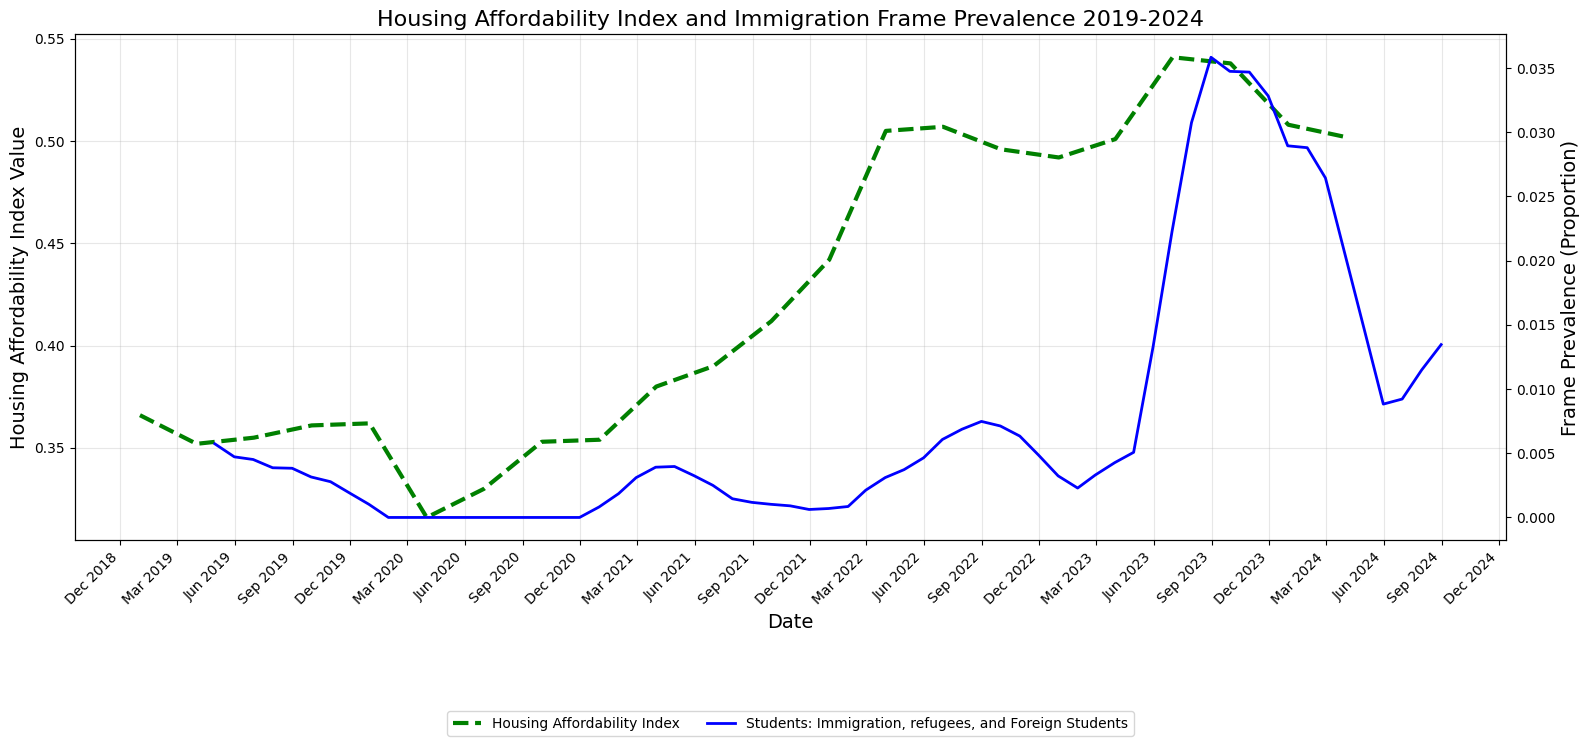

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    0: 'Homelessness',  # Added Homelessness as its own topic
    1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    2: 'Students', # Students as its own topic
    3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plotting the combined graph with the Housing Affordability Index
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the Housing Affordability Index on the first y-axis
ax1.plot(
    df_housing.index,
    df_housing['INDINF_AFFORD'],
    label='Housing Affordability Index',
    color='green',
    linestyle='--',
    linewidth=3
)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Housing Affordability Index Value', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')

# Add grid for readability
ax1.grid(alpha=0.3)

# Create a second y-axis for the topic prevalence
ax2 = ax1.twinx()

# Plot the topic prevalence on the second y-axis for Immigration
ax2.plot(
    topic_prevalence_long[topic_prevalence_long['final_topic'] == 'Students']['published_date'],
    topic_prevalence_long[topic_prevalence_long['final_topic'] == 'Students']['Prevalence'],
    label='Students: Immigration, refugees, and Foreign Students',
    linewidth=2,
    color='blue'
)

# Customize the second y-axis
ax2.set_ylabel('Frame Prevalence (Proportion)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Consolidate all legends into one below the graph
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),  # Position below the graph
    ncol=2,  # Adjust columns for readability
    fontsize=10,
    title_fontsize=12
)

# Add title
plt.title('Housing Affordability Index and Immigration Frame Prevalence 2019-2024', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


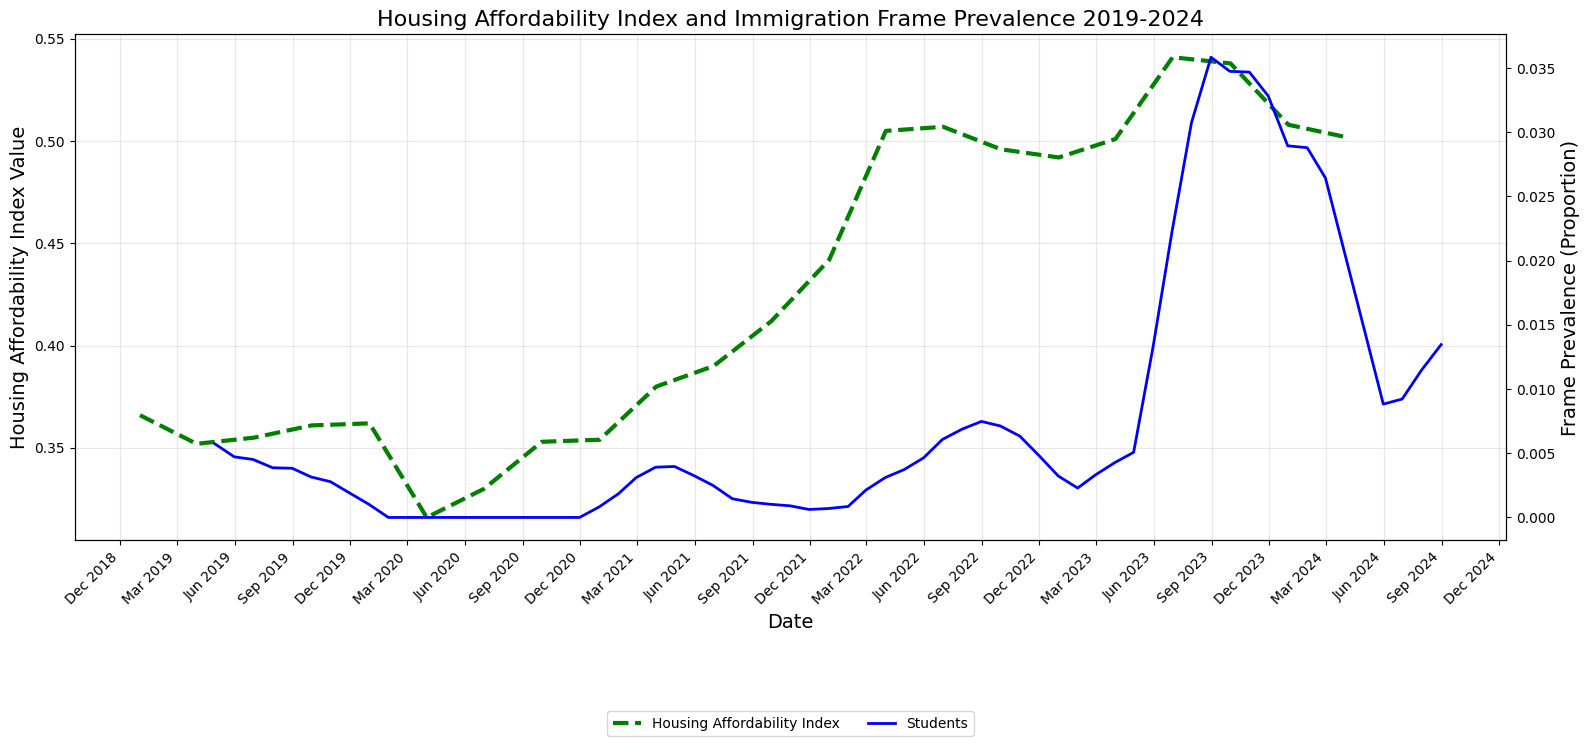

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
# Combining only Topic 1 and Topic 47 for "Non-residence"
topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[2] = topic_pivot[2]

# Combine federal government and policy topics (3, 4, and 5 combined)
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])  # Drop topics 3, 4, and 5 after combining

# Combine Rental topics
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])

# Combine Speculation topics
topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
topic_pivot = topic_pivot.drop(columns=[33, 37])

# Combine House prices topics
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])

# Combine Vulnerable populations topics
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Topic 2 (Students) remains standalone, no need to combine (we keep it as is)
topic_pivot[22] = topic_pivot[22]

# Define topic labels for filtering, now including Homelessness and Students (topic 2 as standalone)
topic_labels = {
    0: 'Homelessness',  # Added Homelessness as its own topic
    1: 'Non-residence: Immigration, refugees, and Foreign Students',  # Non-residence combined (including students)
    2: 'Students', # Students as its own topic
    3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='final_topic',
    value_name='Prevalence'
)

# Plotting the combined graph with the Housing Affordability Index
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the Housing Affordability Index on the first y-axis
ax1.plot(
    df_housing.index,
    df_housing['INDINF_AFFORD'],
    label='Housing Affordability Index',
    color='green',
    linestyle='--',
    linewidth=3
)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Housing Affordability Index Value', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.xticks(rotation=45, ha='right')

# Add grid for readability
ax1.grid(alpha=0.3)

# Create a second y-axis for the topic prevalence
ax2 = ax1.twinx()

# Plot the topic prevalence on the second y-axis for Immigration
ax2.plot(
    topic_prevalence_long[topic_prevalence_long['final_topic'] == 'Students']['published_date'],
    topic_prevalence_long[topic_prevalence_long['final_topic'] == 'Students']['Prevalence'],
    label='Students',
    linewidth=2,
    color='blue'
)

# Customize the second y-axis
ax2.set_ylabel('Frame Prevalence (Proportion)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Consolidate all legends into one below the graph
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),  # Position below the graph
    ncol=2,  # Adjust columns for readability
    fontsize=10,
    title_fontsize=12
)

# Add title
plt.title('Housing Affordability Index and Student Frame Prevalence 2019-2024', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/47444311.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduced font size
/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/47444311.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduced font size
/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/47444311.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduced font size
/var/folders/90/qblj6c_55q72j69jhssyx8w00000gn/T/ipykernel_7119/474443

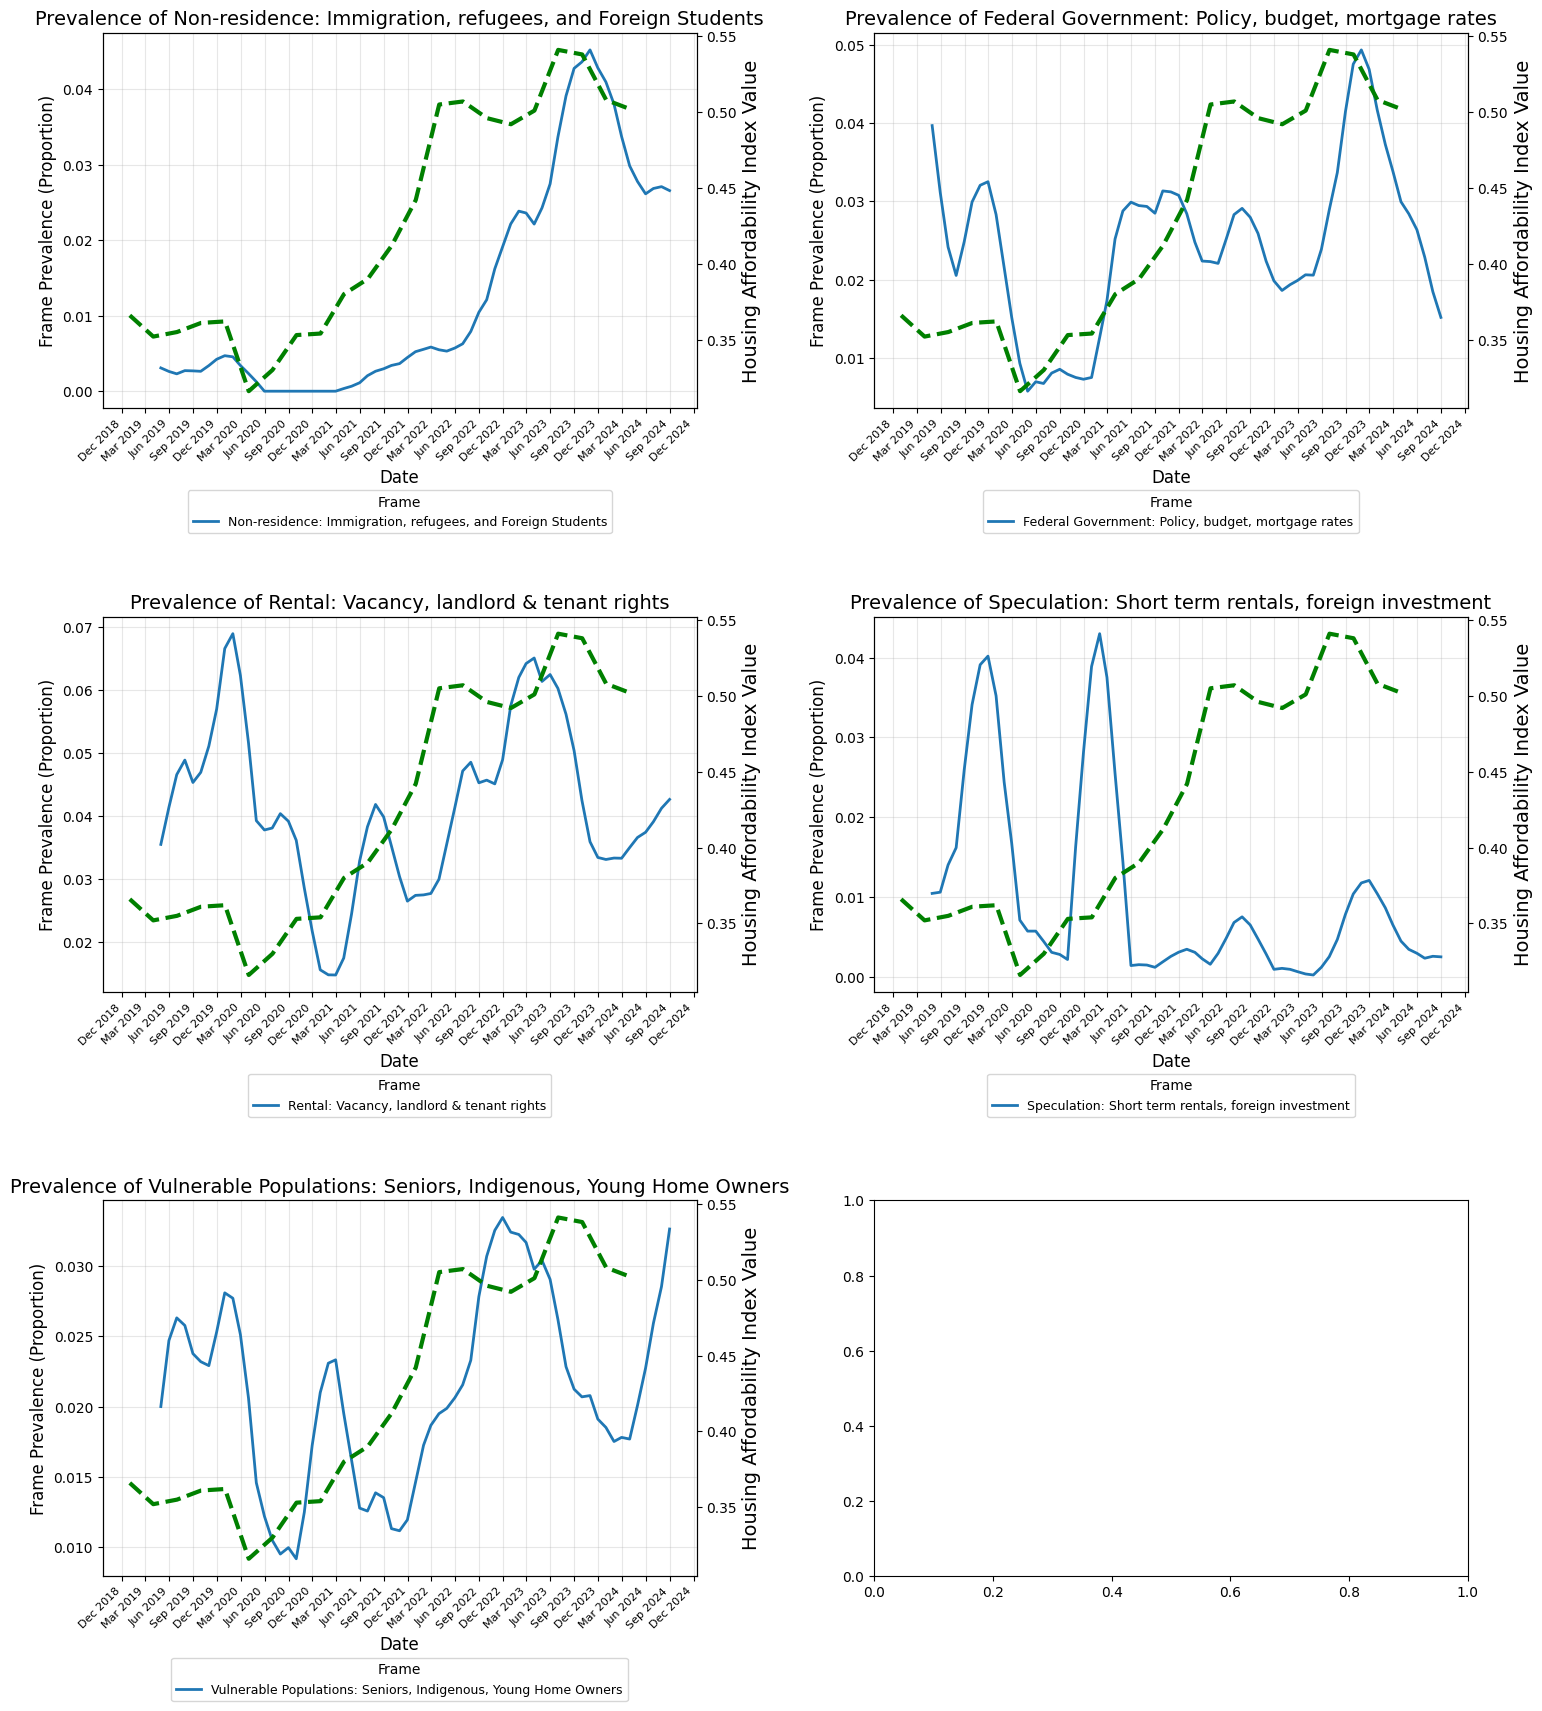

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure published_date is in datetime format
df_topics['published_date'] = pd.to_datetime(df_topics['published_date'])

# Calculate the total number of articles for each month in the original dataset
total_articles_monthly_all = df_topics.resample('ME', on='published_date').size()

# Create a pivot table for all topics
topic_pivot = df_topics.pivot_table(
    index='published_date',  # Ensure published_date is datetime
    columns='final_topic',
    aggfunc='size',
    fill_value=0
)

# Exclude Homelessness topic by keeping it separately
topic_pivot[0] = topic_pivot[0]  # Homelessness remains a separate category

# Combine topics as needed
topic_pivot[1] = topic_pivot[1] + topic_pivot[47]  # Non-residence (combining)
topic_pivot = topic_pivot.drop(columns=[47])  # Drop Topic 47 after combining
topic_pivot[2] = topic_pivot[2]  # Students remain standalone
topic_pivot[3] = topic_pivot[3] + topic_pivot[4] + topic_pivot[5]  # Federal government and policy
topic_pivot = topic_pivot.drop(columns=[4, 5])
topic_pivot[4] = topic_pivot[7] + topic_pivot[26]  # Rental
topic_pivot = topic_pivot.drop(columns=[7, 26])
topic_pivot[26] = topic_pivot[33] + topic_pivot[37]  # Speculation
topic_pivot = topic_pivot.drop(columns=[33, 37])
topic_pivot[37] = topic_pivot[40] + topic_pivot[18] + topic_pivot[12] + topic_pivot[10]  # House prices
topic_pivot = topic_pivot.drop(columns=[40, 18, 12, 10])
topic_pivot[12] = topic_pivot[6] + topic_pivot[31] + topic_pivot[16]  # Vulnerable populations
topic_pivot = topic_pivot.drop(columns=[31, 16])

# Define topic labels for filtering
topic_labels = {
    0: 'Homelessness',
    1: 'Non-residence: Immigration, refugees, and Foreign Students',
    2: 'Students',
    3: 'Federal Government: Policy, budget, mortgage rates',
    4: 'Rental: Vacancy, landlord & tenant rights',
    26: 'Speculation: Short term rentals, foreign investment',
    37: 'House Prices: Inflation, supply and demand',
    12: 'Vulnerable Populations: Seniors, Indigenous, Young Home Owners',
    22: 'Tariffs & Trade'
}

# Rename columns according to topic_labels
topic_pivot_filtered = topic_pivot.rename(columns=topic_labels)[topic_labels.values()]

# Resample to monthly aggregation using 'ME' for monthly end frequency
topic_pivot_monthly_filtered = topic_pivot_filtered.resample('ME').sum()

# Calculate prevalence as the proportion of each topic in relation to the total articles
topic_prevalence_monthly = topic_pivot_monthly_filtered.div(total_articles_monthly_all, axis=0)

# Apply Gaussian smoothing to the prevalence data
sigma = 2  # Standard deviation for smoothing
topic_prevalence_smoothed = topic_prevalence_monthly.apply(
    lambda x: pd.Series(pd.Series(x).rolling(window=7, win_type='gaussian', center=True).mean(std=sigma)),
    axis=0
)

# Convert data to long format for Seaborn
topic_prevalence_long = topic_prevalence_smoothed.reset_index().melt(
    id_vars='published_date',
    var_name='frame',  # Changed to 'frame'
    value_name='Prevalence'
)

# Define the topics you want to plot (Emphasis Frames)
selected_topics = [
    'Non-residence: Immigration, refugees, and Foreign Students',
    'Federal Government: Policy, budget, mortgage rates',
    'Rental: Vacancy, landlord & tenant rights',
    'Speculation: Short term rentals, foreign investment',
    'Vulnerable Populations: Seniors, Indigenous, Young Home Owners'
]

# Create a figure with subplots (2 columns per row)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Loop through each subplot and plot the data
for idx, topic in enumerate(selected_topics):
    ax = axes[idx // 2, idx % 2]  # Access the correct subplot
    sns.lineplot(
        data=topic_prevalence_long[topic_prevalence_long['frame'] == topic],  # 'frame' instead of 'final_topic'
        x='published_date',
        y='Prevalence',
        hue='frame',  # Updated hue to 'frame'
        ax=ax,
        linewidth=2
    )
    
    # Plot the Housing Affordability Index on the same axis (left y-axis)
    ax2 = ax.twinx()
    ax2.plot(
        df_housing.index,
        df_housing['INDINF_AFFORD'],
        label='Housing Affordability Index',
        color='green',
        linestyle='--',
        linewidth=3
    )
    ax2.set_ylabel('Housing Affordability Index Value', fontsize=14, color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    ax.set_title(f'Prevalence of {topic}', fontsize=14)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Frame Prevalence (Proportion)', fontsize=12)
    ax.grid(alpha=0.3)

    # Format the x-axis to show readable date labels with smaller font size
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduced font size

    # Adjust spacing for the legend
    ax.legend(title="Frame", loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=9, title_fontsize=10)

# Adjust layout to prevent overlap and add more space between plots
plt.tight_layout(pad=3.5)  # Increased padding between plots

# Show the plot
plt.show()


In [270]:
#get a random sample from final topic 6
df_topics[df_topics['final_topic'] == 6].sample(5)

#

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
3495,98 new homes in Langley Township,Rattan Mall,2022-10-31,voiceonline.com,"FAMILIES, seniors and individuals will soon ha...","Please Enter Your Name Here,Rattan Mall,posted...",False,26.910084,", seniors and individuals will soon have acces...",", seniors and individuals will soon have acces...",...,seniors individuals soon access ninetyeight ne...,True,seniors individuals soon access ninetyeight ne...,NaN,Canada,Publisher,The Voice Group,6_seniors_homes_community_society,6,6_seniors_homes_community_society
11279,Debt among Canadian millennials at record leve...,Melissa Lopez-Martinez,2023-08-23,ctvnews.ca,Canadian millennials are more likely to face t...,Melissa Lopez-Martinez,False,36.819008,Canadian millennials are more likely to face t...,canadian millennials are more likely to face t...,...,canadian millennials likely face brunt waverin...,True,millennials likely face brunt wavering labour ...,2.0,Canada,Publisher,Bell Media,8_retirement_canadians_interest_survey,6,6_seniors_homes_community_society
10184,Worsening Economy Threatens Retirement Securit...,Michael Katz,2022-06-28,ai-cio.com,"Newsmakers June 28, 2022 Survey finds rising i...",Unknown,False,30.130352,"Newsmakers June 28, 2022 Survey finds rising i...","newsmakers june 28, 2022 survey finds rising i...",...,newsmakers survey finds rising inflation inter...,True,newsmakers survey finds rising inflation inter...,NaN,NaN,NaN,NaN,8_retirement_canadians_interest_survey,6,6_seniors_homes_community_society
3591,"A Victoria co-op offers three bedrooms for $1,...",Emily Fagan,2023-02-24,cbc.ca,"For at least one family in Greater Victoria, h...","Emily Fagan,Mail,The Globe,Vice",False,47.203773,"For at least one family in Greater Victoria, h...","for at least one family in greater victoria, h...",...,least one family greater victoria housing affo...,True,least one family greater victoria affordabilit...,1.0,Canada,Publisher,CBC,6_seniors_homes_community_society,6,6_seniors_homes_community_society
7708,"New homes for women, children open in Courtenay",Unknown,2024-08-23,einpresswire.com,"CANADA, August 23 - Women, gender-diverse peop...",Unknown,False,25.199596,", August 23 - Women, gender-diverse people and...",", august 23 - women, gender-diverse people and...",...,women genderdiverse people dependent children ...,True,women genderdiverse people dependent children ...,NaN,International,News Aggregator,NaN,6_seniors_homes_community_society,6,6_seniors_homes_community_society


In [274]:
#get observation from index 11279
df_topics.loc[11279]

#print the entire summary no phrase
print(df_topics.loc[11279, 'summary_no_phrase'])
print(df_topics.loc[11279, 'title'])
print(df_topics.loc[11279, 'published_date'])
print(df_topics.loc[11279, 'clean_url'])

Canadian millennials are more likely to face the brunt of a wavering labour market as most face mounting debt with an income that fails to keep up with inflation, according to a report from  Economics.

The report released on Wednesday said Canadian millennials are more vulnerable to serious financial burdens if job losses continue to rise in their age bracket. July marked the third consecutive month Canada's overall unemployment rate has increased; the rate stood at 5 2 per cent in May before it rose to 5 5 per cent in July, according to Statistic Canada.

The data, based on changing average mortgage rates between January 2019 and January 2023, found older millennials between the ages of 35 and 44 had an average debt-to-income ratio of 250 per cent in 2019. Approximately half of what Canadians in the same age group reported having in 1999 reported, which was 150 per cent.

Younger millennials are also reporting above that nearly 25-year statistic, as their debt-to-income ratio is at 1

In [277]:
#get a random sample from final topic 6
df_topics[df_topics['final_topic'] == 4].sample(5)

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
6664,Experts: Canadian federal budget 2024,Unknown,2024-04-15,mcgill.ca,Finance Minister Chrystia Freeland will presen...,Unknown,False,40.608242,Finance Minister Chrystia Freeland will presen...,finance minister chrystia freeland will presen...,...,finance minister chrystia freeland present nex...,True,finance minister chrystia freeland present nex...,NaN,NaN,NaN,NaN,4_budget_freeland_fiscal_tax,4,4_budget_freeland_fiscal_tax
6632,Underused housing tax to generate $694 million...,Unknown,2024-04-19,investmentexecutive.com,"'Given their magnitude, these costs could sign...",Unknown,False,42.989030,"'Given their magnitude, these costs could sign...","'given their magnitude, these costs could sign...",...,given magnitude costs could significantly redu...,True,given magnitude costs could significantly redu...,NaN,Canada,Publisher,Self Owned,4_budget_freeland_fiscal_tax,4,4_budget_freeland_fiscal_tax
7199,Freeland announces housing affordability measu...,Peter Zimonjic,2024-04-11,cbc.ca,Social Sharing\nDeputy Prime Minister and Fina...,"An Account Of,Sunday Times,Peter Zimonjic,Seni...",False,25.793726,Social Sharing\nDeputy Prime Minister and Fina...,social sharing\ndeputy prime minister and fina...,...,social sharing deputy prime minister finance m...,True,social sharing deputy prime minister finance m...,1.0,Canada,Publisher,CBC,4_budget_freeland_fiscal_tax,4,4_budget_freeland_fiscal_tax
5569,Freeland to present fall fiscal update Tuesday...,Nojoud Al Mallees,2023-11-19,calgarysun.com,"This advertisement has not loaded yet, but you...","Canadian Press,Nojoud Al Mallees",False,30.896000,Freeland to present fall fiscal update Tuesday...,freeland to present fall fiscal update tuesday...,...,freeland present fall fiscal update tuesday co...,True,freeland present fall fiscal update tuesday co...,3.0,Alberta,"Publisher, Syndication",Postmedia,4_budget_freeland_fiscal_tax,4,4_budget_freeland_fiscal_tax
5325,Freeland to present fall fiscal update as cost...,The Canadian Press,2023-11-19,vicnews.com,Finance Minister Chrystia Freeland will table ...,The Canadian Press,False,37.554214,Finance Minister Chrystia Freeland will table ...,finance minister chrystia freeland will table ...,...,finance minister chrystia freeland table fall ...,True,finance minister chrystia freeland table fall ...,1.0,British Columbia,Publisher,Black Press media,4_budget_freeland_fiscal_tax,4,4_budget_freeland_fiscal_tax


In [278]:
#get observation from index 11279
df_topics.loc[7199]

#print the entire summary no phrase
print(df_topics.loc[7199, 'summary_no_phrase'])
print(df_topics.loc[7199, 'title'])
print(df_topics.loc[7199, 'published_date'])
print(df_topics.loc[7199, 'clean_url'])

Social Sharing
Deputy Prime Minister and Finance Minister Chrystia Freeland announced a number of housing affordability measures Thursday that she said will help buyers get their first homes and help current homeowners afford the homes they have.
" really hope and believe the specific measures we announced today are going to provide a lot of comfort and a lot of hope to young Canadians," she said in Toronto.
Freeland announced that effective April 16, the amount first-time home buyers can withdraw from their RRSPs to make a down payment on their first home will rise from a maximum of $35,000 to $60,000.
"This, plus the Tax-Free First Home Savings Account, can be combined, which will give younger Canadians more tools to save what is actually needed," she said.
The Tax-Free First Home Savings Account program allows Canadians to save up to $8,000 per year toward a home, with a maximum lifetime contribution limit of $40,000.
Contributions to the accounts provide people with tax rebates. Gr

In [279]:
#get a random sample from final topic 6
df_topics[df_topics['final_topic'] == 7].sample(5)

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
9186,Real estate prices in Canada will go up with s...,Radheyan Simonpillai,2021-06-26,nowtoronto.com,NOW MagazineLifeReal EstateReal estate prices ...,"Radheyan Simonpillai,Radheyan'S First Assignme...",False,47.474830,MagazineLifeReal EstateReal estate prices in ...,magazinelifereal estatereal estate prices in ...,...,magazinelifereal estatereal estate prices cana...,True,magazinelifereal estatereal estate prices cana...,0.0,Ontario,Publisher,Michael Hollett and Alice Klein,1_rent_cent_per_rental,7,7_rental_rent_rentals_average
8111,Why Canada is losing affordable rental housing...,"Shaina Luck, Matthew Pierce, Ivan Angelovski, ...",2022-03-10,cbc.ca,Everything seems to be getting more expensive....,Unknown,False,35.983578,Everything seems to be getting more expensive....,everything seems to be getting more expensive....,...,everything seems getting expensive food gas ho...,True,everything seems getting expensive food gas pr...,1.0,Canada,Publisher,CBC,7_rental_rent_rentals_average,7,7_rental_rent_rentals_average
9517,Who's getting burned in London's red-hot housi...,Jonathan Juha,2021-07-10,lfpress.com,"This advertisement has not loaded yet, but you...","Jonathan Juha,Megan Stacey",False,31.327150,As soaring average prices and tight supply put...,as soaring average prices and tight supply put...,...,soaring average prices tight supply put home o...,True,soaring average prices tight supply put owners...,3.0,Ontario,"Publisher, Syndication",Postmedia,1_rent_cent_per_rental,7,7_rental_rent_rentals_average
4929,"Report Reveals Rental Costs of $1,360 on Natio...",Andrew Chen,2023-09-02,theepochtimes.com,Canadian renters signing new leases have paid ...,Andrew Chen,False,28.902205,Canadian renters signing new leases have paid ...,canadian renters signing new leases have paid ...,...,canadian renters signing new leases paid avera...,True,renters signing new leases paid average past t...,4.0,United States,Publisher,Epoch Media Group,7_rental_rent_rentals_average,7,7_rental_rent_rentals_average
16139,Strengthening property rights part of the answ...,Joseph Quesnel,2023-07-31,troymedia.com,Inadequate safeguards for property rights affe...,Joseph Quesnel,False,30.691015,Inadequate safeguards for property rights affe...,inadequate safeguards for property rights affe...,...,inadequate safeguards property rights affectin...,True,inadequate safeguards property rights affectin...,NaN,Canada,Publisher,Self Owned,1_rent_cent_per_rental,7,7_rental_rent_rentals_average


In [280]:
#get observation from index 11279
df_topics.loc[8111]

#print the entire summary no phrase
print(df_topics.loc[8111, 'summary_no_phrase'])
print(df_topics.loc[8111, 'title'])
print(df_topics.loc[8111, 'published_date'])
print(df_topics.loc[8111, 'clean_url'])

Everything seems to be getting more expensive. Food, gas and housing prices are on the rise while paycheques are slow to keep pace. The  News series Priced Out explains why you're paying more at the register and how Canadians are coping with the high cost of everything. Kevin 'Toole rarely takes his dog, Stella, for a walk without two or three neighbours stopping him to chat. " love my neighbours, the community is great, 've got everything  want, and at 72, where am  going to go?" he said of his high-rise apartment in Hamilton.  'Toole pays $825 per month for the two-bedroom rental he's lived in since 2010.  He worked for 30 years as a waiter. Now he collects his federal pension and works part time at McDonald's to help keep his head above water.   Watch "Priced out: Canada's rental crisis" on The Fifth Estate Thursday at 9 p m. on - or stream it on  Gem.  With rental rates on the rise, he knows that losing his apartment would be a big financial blow.  "To find an affordable apartment,

In [281]:
#get a random sample from final topic 6
df_topics[df_topics['final_topic'] == 0].sample(5)

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
14144,Canada and Manitoba Partner with City of Brand...,Canada Mortgage,2021-07-28,newswire.ca,"BRANDON, MB, July 28, 2021 /CNW/ - The federal...","Canada Mortgage,Housing Corporation",False,46.464546,", , July 28, 2021 // - The federal and provinc...",", , july 28, 2021 // - the federal and provinc...",...,federal provincial governments collaborating c...,True,federal provincial governments collaborating c...,2.0,Canada,"News Aggregator, national",Platinum Equity,0_affordable_support_new_homelessness,0,0_homelessness_homeless_people_health
15781,'We're just at a standstill': Housing crisis c...,Nicola Seguin,2023-06-14,cbc.ca,Erin Austin wants to see more of the people sh...,"English,French,Halifax,Nicola Seguin,Nicola Se...",False,32.090107,Erin Austin wants to see more of the people sh...,erin austin wants to see more of the people sh...,...,erin austin wants see people works find perman...,True,erin austin wants see people works find perman...,1.0,Canada,Publisher,CBC,0_affordable_support_new_homelessness,0,0_homelessness_homeless_people_health
10730,Opinion: Another Groundhog Day in BC for housi...,Unknown,2023-01-19,dailyhive.com,Written for Daily Hive Urbanized by Paul Sulli...,Unknown,True,35.885426,Written for Daily Hive Urbanized by Paul Sulli...,written for daily hive urbanized by paul sulli...,...,written daily hive urbanized paul sullivan pro...,True,written daily hive urbanized paul sullivan pro...,0.0,British Columbia,Publisher,Privately owned,0_affordable_support_new_homelessness,0,0_homelessness_homeless_people_health
12236,Alberta says Ottawa is overstepping by funding...,Paula Tran,2024-04-05,globalnews.ca,The Alberta government is considering new legi...,"Global News,Paula Tran",False,48.031754,The Alberta government is considering new legi...,the alberta government is considering new legi...,...,alberta government considering new legislation...,True,alberta considering new legislation prevent fe...,1.0,Canada,Publisher,Corus entertainment,0_affordable_support_new_homelessness,0,0_homelessness_homeless_people_health
14330,Core Development Group Appoints Colin Yee as C...,Unknown,2021-07-22,businesswire.com,"July 22, 2021 07:02 AM Eastern Daylight Time T...",Unknown,False,28.340155,"July 22, 2021 07:02 Eastern Daylight Time --(...","july 22, 2021 07:02 eastern daylight time --(...",...,two eastern daylight time core development gro...,True,two eastern daylight time core development gro...,NaN,International,News aggregator,Berkshire Hathaway,0_affordable_support_new_homelessness,0,0_homelessness_homeless_people_health


In [282]:
#get observation from index 11279
df_topics.loc[15781]

#print the entire summary no phrase
print(df_topics.loc[15781, 'summary_no_phrase'])
print(df_topics.loc[15781, 'title'])
print(df_topics.loc[15781, 'published_date'])
print(df_topics.loc[15781, 'clean_url'])

Erin Austin wants to see more of the people she works with find permanent housing, but it's getting increasingly difficult. 
An outreach manager with Adsum for Women and Children in Halifax, which operates two emergency shelters and supportive housing in Halifax Regional Municipality, Austin said it's now taking six months to a year for her clients to secure permanent housing they can afford.
"That's a constant worry, because if the spaces in the shelters are full, then there is no space for new folks to come in," she said. "We're just at a standstill until those folks get moved on."
Many of the people Adsum works with earn minimum wage or receive income assistance, she said, and that's not enough to keep up "because of the increased cost of living, the increased cost of rent, the fact that there is not enough housing for the amount of people that are looking."
Organizations like Adsum that work with people who are unhoused or precariously housed in Halifax say the high cost and low av

In [283]:
#get a random sample from final topic 6
df_topics[df_topics['final_topic'] == 2].sample(5)

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
6381,Brampton Mayor Calls On The Feds To Limit Numb...,Unknown,2024-01-22,thedeepdive.ca,Brampton Mayor Patrick Brown is urging the fed...,Unknown,False,27.846045,Brampton Mayor Patrick Brown is urging the fed...,brampton mayor patrick brown is urging the fed...,...,brampton mayor patrick brown urging federal go...,True,brampton mayor patrick brown urging federal ad...,NaN,NaN,NaN,NaN,2_students_international_student_universities,2,2_students_international_student_universities
6130,60K+ International Students Make Canada Home,Unknown,2024-01-19,asianlite.com,Advertisement\n\nThe nation opened its doors t...,Unknown,False,34.454422,The nation opened its doors to immigrants to r...,the nation opened its doors to immigrants to r...,...,nation opened doors immigrants replace aging w...,True,nation opened doors immigrants replace aging w...,NaN,NaN,NaN,NaN,2_students_international_student_universities,2,2_students_international_student_universities
4922,Should international students be capped? Here'...,Uday Rana,2023-09-12,globalnews.ca,Send this page to someone via email\n\nAs Cana...,"Global News,Uday Rana",False,29.007950,Send this page to someone via email\n\nAs Cana...,send this page to someone via email\n\nas cana...,...,send page someone via email canada continues g...,True,send page someone via email canada continues g...,1.0,Canada,Publisher,Corus entertainment,2_students_international_student_universities,2,2_students_international_student_universities
6377,Canadian Federation of Students Upset With Stu...,Noah Sheppard,2024-01-24,vocm.com,The local chapter of the Canadian Federation o...,Noah Sheppard,False,27.915085,The local chapter of the Canadian Federation o...,the local chapter of the canadian federation o...,...,local chapter canadian federation students hap...,True,local chapter federation students happy ottawa...,NaN,NaN,NaN,NaN,2_students_international_student_universities,2,2_students_international_student_universities
8398,As Atlantic Canada struggles with student hous...,Contributed,2023-09-21,saltwire.com,By Javier Ortega-Araiza\n Special to SaltWire\...,Contributed,True,29.784168,By Javier Ortega-Araiza\n Special to SaltWire\...,by javier ortega-araiza\n special to saltwire\...,...,javier ortegaaraiza special saltwire long sean...,True,javier ortegaaraiza special saltwire long sean...,3.0,British Columbia,"Publisher, Syndication",Postmedia,2_students_international_student_universities,2,2_students_international_student_universities


In [284]:
#get observation from index 11279
df_topics.loc[4922]

#print the entire summary no phrase
print(df_topics.loc[4922, 'summary_no_phrase'])
print(df_topics.loc[4922, 'title'])
print(df_topics.loc[4922, 'published_date'])
print(df_topics.loc[4922, 'clean_url'])

Send this page to someone via email

As Canada continues to grapple with a housing crisis, the conversation is increasingly turning to international students coming into the country.

But multiple provinces are pushing back on federal suggestions that an international student cap could help solve the problem, and say they haven't been consulted.

Immigration Minister Marc Miller, Housing Minister Sean Fraser and Public Safety Minister Dominic LeBlanc have all indicated that Ottawa is considering a cap on student intake.

Following their comments over the past two weeks, Global News reached out to provincial and territorial governments about how it would impact them and whether they would support any caps.

Three provinces, British Columbia, New Brunswick, and Newfoundland and Labrador, told Global News they had not been consulted on any proposed cap. Only the government of the Northwest Territories said it had been in contact with Ottawa about a proposed student cap.

 below 

'The  ha

In [285]:
#find this quote from the clean_url headtopics.com 'So do we really have a 'housing crisis' or do we have an immigration crisis? We have to pay for this increase on the backs of 'the middle class' for which Justin Trudeau was working”

df_topics[df_topics['clean_url'].str.contains('headtopics.com') & df_topics['summary_no_phrase'].str.contains("So do we really have a 'housing crisis' or do we have")]

,title,author,published_date,clean_url,summary,authors,is_opinion,_score,summary_no_phrase,lowcase_summary,...,summary_no_stopwords,final_classification,cleaned,political_lean,location,type,ownership,Mapped_Description,final_topic,final_Description
3798,1 million new Canadians in 2022,Ctv News,2023-03-22,headtopics.com,Immigration is driving the steepest increase i...,CTV News,False,29.432022,Immigration is driving the steepest increase i...,immigration is driving the steepest increase i...,...,immigration driving steepest increase populati...,True,immigration driving steepest increase populati...,1.0,International,New aggregator,NaN,1_immigration_immigrants_population_newcomers,1,1_immigration_immigrants_population_newcomers
